# GluonTS - Transfer Learning Approach (quarterly) 

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_yearly_atm`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_yearly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [1]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [3]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [4]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [5]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [6]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [7]:
dataname_a = "m4_yearly"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.


23000

In [8]:
dataname_b1 = "m4_yearly_industry"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.


3716

In [9]:
dataname_b2 = "m4_yearly_finance"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.


6519

In [10]:
dataname_b3 = "m4_yearly_demographic"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_demographic.


1088

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 23000
length test: 23000

start:
 1750-01-31 00:00:00
target:
 [5172.1 5133.5 5186.9 5084.6 5182.  5414.3 5576.2 5752.9 5955.2 6087.8]
feat_static_cat:
 [0]


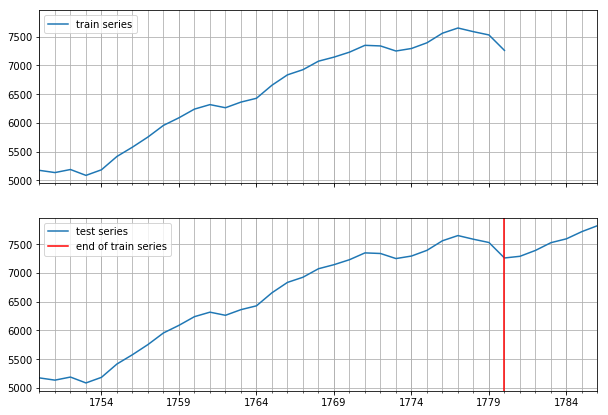

In [11]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 1088
length test: 1088

start:
 1750-01-31 00:00:00
target:
 [3769.9 3559.  3272.4 2944.5 3094.  3423.8 3557.7 3859.9 3970.1 3832.2]
feat_static_cat:
 [1]


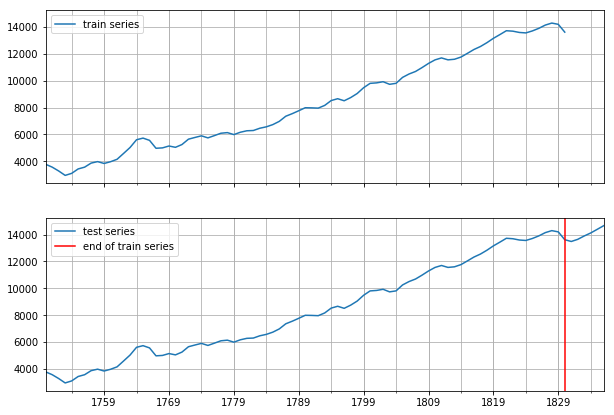

In [12]:
dataset_b = dataset_b3

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [13]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [14]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [15]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='12M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='23000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=6), train=<gluonts.dataset.common.FileDataset object at 0x7f2f18b997b8>, test=<gluonts.dataset.common.FileDataset object at 0x7f2f18b3e358>)

 TrainDatasets(metadata=MetaData(freq='12M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='1088')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=6), train=<gluonts.dataset.common.FileDataset object at 0x7f2f18b51240>, test=<gluonts.dataset.common.FileDataset object at 0x7f2f18b3ec50>)


In [16]:
print(dataname_a)
print(dataname_b1)

m4_yearly
m4_yearly_industry


In [17]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [18]:
print(dataname_a)
print(dataname_b1)

m4_yearly
m4_yearly_industry


## Study 4: `m4_yearly` vs. `m4_yearly_industry`

In [19]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 50/50 [00:01<00:00, 36.53it/s, avg_epoch_loss=8.5]
INFO:root:Epoch[0] Elapsed time 1.376 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.504471
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.00it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 1.286 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.886298
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.42it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[2] Elapsed time 1.214 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.110143
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.94it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[3] Elapsed time 1.199 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.389315
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.42it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[4] Elapsed time 1.243 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 49.86it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[37] Elapsed time 1.010 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.376101
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.59it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[38] Elapsed time 1.126 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.207918
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 46.01it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 1.093 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.731974
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.16it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 1.222 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.960153
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.56it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[41] Elapsed time 1.103 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.037563
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 45.55it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[74] Elapsed time 1.104 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.026823
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 48.79it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[75] Elapsed time 1.030 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.097772
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.74it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 1.126 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.450733
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 48.02it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 1.047 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.128091
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.704776  0.20559  106.46519            0.188851            0.121415    42   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 43


100%|██████████| 50/50 [00:01<00:00, 36.43it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 1.379 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.361025
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.88it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 1.293 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.887139
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.06it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[2] Elapsed time 1.195 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.117778
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.11it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 1.253 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.468842
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.52it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[4] Elapsed time 1.238 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 48.44it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[37] Elapsed time 1.039 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.516047
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.74it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[38] Elapsed time 1.200 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.276766
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.29it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 1.191 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.862285
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.38it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[40] Elapsed time 1.243 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.148069
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.09it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[41] Elapsed time 1.139 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.025125
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.14it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[74] Elapsed time 1.195 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.142846
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.30it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 1.190 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.197944
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.24it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 1.189 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.675696
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.56it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[77] Elapsed time 1.126 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.257240
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.377054  0.203522  97.793714            0.184226            0.134843   

   seed  epochs  num_batches train data           eval data  
0    43     100           50  m4_yearly  m4_yearly_industry  
Next seed: 44


100%|██████████| 50/50 [00:01<00:00, 34.13it/s, avg_epoch_loss=8.39]
INFO:root:Epoch[0] Elapsed time 1.470 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.390623
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.35it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[1] Elapsed time 1.274 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.837493
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.48it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 1.214 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.131030
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.76it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 1.204 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.474072
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.86it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[4] Elapsed time 1.230 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 45.54it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[37] Elapsed time 1.107 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.535886
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.47it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[38] Elapsed time 1.060 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.199467
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.63it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[39] Elapsed time 1.206 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.890546
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.04it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 1.225 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.893149
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.01it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 1.116 seconds
I

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.644356  0.18201  68.096264            0.167096            0.125277    44   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 45


100%|██████████| 50/50 [00:01<00:00, 33.93it/s, avg_epoch_loss=8.35]
INFO:root:Epoch[0] Elapsed time 1.478 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.351627
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.93it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[1] Elapsed time 1.259 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.021420
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.60it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[2] Elapsed time 1.153 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.218781
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.25it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[3] Elapsed time 1.223 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.558501
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.15it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[4] Elapsed time 1.194 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 45.05it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[37] Elapsed time 1.115 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.663585
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 50.03it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[38] Elapsed time 1.008 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.352268
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.88it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 1.173 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.060494
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.35it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 1.110 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.071069
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.96it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[41] Elapsed time 1.092 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.073140
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 44.99it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[74] Elapsed time 1.119 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.169389
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 43.30it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 1.159 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.203270
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.31it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[76] Elapsed time 1.188 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.642127
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.46it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[77] Elapsed time 1.241 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.315003
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.786949  0.189811  76.911849            0.177737            0.131556   

   seed  epochs  num_batches train data           eval data  
0    45     100           50  m4_yearly  m4_yearly_industry  
Next seed: 46


100%|██████████| 50/50 [00:01<00:00, 36.09it/s, avg_epoch_loss=8.45]
INFO:root:Epoch[0] Elapsed time 1.389 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.454084
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.27it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[1] Elapsed time 1.249 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.777933
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.01it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 1.228 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.099694
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.11it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 1.194 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.469341
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.78it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[4] Elapsed time 1.232 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 47.24it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[37] Elapsed time 1.065 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.572787
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.53it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[38] Elapsed time 1.057 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.222297
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.86it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[39] Elapsed time 1.092 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.835304
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.27it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 1.106 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.937070
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.25it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[41] Elapsed time 1.159 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.144706
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[74] Elapsed time 1.250 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.354326
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 38.74it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[75] Elapsed time 1.293 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.107741
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 36.40it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[76] Elapsed time 1.378 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.508827
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.68it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[77] Elapsed time 1.234 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.150474
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.060598  0.190311  70.311063            0.174663            0.118757   

   seed  epochs  num_batches train data           eval data  
0    46     100           50  m4_yearly  m4_yearly_industry  
Next seed: 47


100%|██████████| 50/50 [00:01<00:00, 37.68it/s, avg_epoch_loss=8.3]
INFO:root:Epoch[0] Elapsed time 1.332 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.300957
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.95it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[1] Elapsed time 1.322 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.953688
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.29it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 1.310 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.185384
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.46it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[3] Elapsed time 1.060 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.618228
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.64it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[4] Elapsed time 1.102 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 44.92it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[37] Elapsed time 1.122 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.542198
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.82it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[38] Elapsed time 1.053 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.310337
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.62it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 1.269 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.857199
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.65it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[40] Elapsed time 1.232 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.966600
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 45.76it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 1.097 seconds


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.817383  0.18516  65.956476             0.17236            0.120862    47   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 48


100%|██████████| 50/50 [00:01<00:00, 36.02it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 1.395 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.259591
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.78it/s, avg_epoch_loss=7.81]
INFO:root:Epoch[1] Elapsed time 1.294 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.809849
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.36it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 1.060 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.096091
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[3] Elapsed time 1.135 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.460881
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.66it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[4] Elapsed time 1.122 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 46.26it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[37] Elapsed time 1.089 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.604694
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 53.14it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[38] Elapsed time 0.946 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.310488
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.42it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[39] Elapsed time 1.128 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.830231
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.55it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 1.178 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.962990
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.43it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[41] Elapsed time 1.131 seconds
I

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.063190
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.73it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[74] Elapsed time 1.176 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.209669
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.57it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[75] Elapsed time 1.180 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.085264
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 37.12it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[76] Elapsed time 1.350 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.411025
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.11it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[77] Elapsed time 1.253 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.138513
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.502319  0.178744  64.99656            0.166709            0.125511    48   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 49


100%|██████████| 50/50 [00:01<00:00, 42.32it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[0] Elapsed time 1.184 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.047287
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.95it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[1] Elapsed time 1.174 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.824245
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 50.41it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 1.001 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.147297
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.78it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[3] Elapsed time 1.094 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.529483
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.36it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[4] Elapsed time 1.105 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 51.00it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[37] Elapsed time 0.989 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.662529
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 51.19it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[38] Elapsed time 0.982 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.508654
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 49.49it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[39] Elapsed time 1.012 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.264403
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 41.00it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[40] Elapsed time 1.224 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.157419
INFO:root:Epoch[41] Learning rate is 0.000125
100%|██████████| 50/50 [00:01<00:00, 47.83it/s, avg_epoch_loss

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.127874
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 43.43it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 1.159 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.301678
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.40it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 1.181 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.235435
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 37.96it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 1.327 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.847978
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 43.03it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[77] Elapsed time 1.169 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.381353
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.463532  0.208417  91.70052            0.187695            0.127211    49   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 50


100%|██████████| 50/50 [00:01<00:00, 40.45it/s, avg_epoch_loss=8.7]
INFO:root:Epoch[0] Elapsed time 1.239 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.698136
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.85it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[1] Elapsed time 1.173 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.967265
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.58it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[2] Elapsed time 1.154 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.261159
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 31.75it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[3] Elapsed time 1.587 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.563689
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 36.77it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[4] Elapsed time 1.363 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:01<00:00, 47.07it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[37] Elapsed time 1.067 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.581845
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.31it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[38] Elapsed time 1.063 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.355415
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 1.138 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.056478
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 47.77it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 1.053 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.003124
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.61it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[41] Elapsed time 1.128 seconds
INF

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.167244
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 40.45it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[74] Elapsed time 1.242 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.716728
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.15it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[75] Elapsed time 1.192 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.126387
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 42.17it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[76] Elapsed time 1.195 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.293392
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:01<00:00, 39.70it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[77] Elapsed time 1.263 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.030072
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.052526  0.19254  73.032281            0.174946            0.126963    50   

   epochs  num_batches train data           eval data  
0     100           50  m4_yearly  m4_yearly_industry  
Next seed: 51


100%|██████████| 50/50 [00:01<00:00, 36.88it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 1.360 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.266300
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.25it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[1] Elapsed time 1.354 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.862214
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.85it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 1.237 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.180719
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 48.72it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[3] Elapsed time 1.029 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.548719
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.30it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[4] Elapsed time 1.131 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:01<00:00, 49.64it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[37] Elapsed time 1.012 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.420615
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 48.27it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[38] Elapsed time 1.042 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.273554
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.79it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 1.173 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.811695
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 46.41it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 1.079 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.068080
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 44.89it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[41] Elapsed time 1.116 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.245806  0.199327  84.807345            0.180589            0.136895   

   seed  epochs  num_batches train data           eval data  
0    51     100           50  m4_yearly  m4_yearly_industry  


MASE     sMAPE        MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.704776  0.205590  106.465190            0.188851            0.121415   
0  4.377054  0.203522   97.793714            0.184226            0.134843   
0  3.644356  0.182010   68.096264            0.167096            0.125277   
0  3.786949  0.189811   76.911849            0.177737            0.131556   
0  4.060598  0.190311   70.311063            0.174663            0.118757   
0  3.817383  0.185160   65.956476            0.172360            0.120862   
0  3.502319  0.178744   64.996560            0.166709            0.125511   
0  4.463532  0.208417   91.700520            0.187695            0.127211   
0  4.052526  0.192540   73.032281            0.174946            0.126963   
0  4.245806  0.199327   84.807345            0.180589            0.136895   

   seed  epochs  num_batches train data           eval data  
0    42     100           50  m4_yearly  m4_yearly_industry  
0    43     100           50  m4_yearly  m4_yearly_industry  
0    44     100           50  m4_yearly  m4_yearly_industry  
0    45     100           50  m4_yearly  m4_yearly_industry  
0    46     100           50  m4_yearly  m4_yearly_industry  
0    47     100           50  m4_yearly  m4_yearly_industry  
0    48     100           50  m4_yearly  m4_yearly_industry  
0    49     100           50  m4_yearly  m4_yearly_industry  
0    50     100           50  m4_yearly  m4_yearly_industry  
0    51     100           50  m4_yearly  m4_yearly_industry

In [20]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_industry", dataname_b="m4_yearly_industry", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 50/50 [00:01<00:00, 34.92it/s, avg_epoch_loss=8.62]
INFO:root:Epoch[0] Elapsed time 1.434 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.624942
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 48.36it/s, avg_epoch_loss=8.09]
INFO:root:Epoch[1] Elapsed time 1.037 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.092737
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.93it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 1.045 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.704741
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.44it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[3] Elapsed time 1.239 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.502602
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 48.45it/s, avg_epoch_loss=7.55]
INFO:root:Epoch[4] Elapsed time 1.040 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 47.77it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[38] Elapsed time 1.054 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.942793
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.20it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[39] Elapsed time 1.090 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.253780
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.44it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 1.084 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.822650
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.55it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[41] Elapsed time 1.079 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.266370
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.46it/s, avg_epoch_loss=6.87]
INFO:root:Ep

100%|██████████| 50/50 [00:01<00:00, 40.15it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 1.248 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.756056
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 42.87it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[76] Elapsed time 1.168 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.163396
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.30it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[77] Elapsed time 1.249 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.727853
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.74it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[78] Elapsed time 1.266 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.011543
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.38it/s, avg_epoch_loss=7.04

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.493607  0.176967  44.316679            0.164016            0.114487   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 43


100%|██████████| 50/50 [00:01<00:00, 40.41it/s, avg_epoch_loss=8.44]
INFO:root:Epoch[0] Elapsed time 1.241 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.444436
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.07it/s, avg_epoch_loss=8.01]
INFO:root:Epoch[1] Elapsed time 1.163 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.011217
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.82it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[2] Elapsed time 1.200 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.704587
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.48it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[3] Elapsed time 1.239 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.618471
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.35it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[4] Elapsed time 1.156 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.115672
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 43.08it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[74] Elapsed time 1.165 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.181833
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 39.44it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[75] Elapsed time 1.275 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.865714
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 39.37it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[76] Elapsed time 1.274 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.355054
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:01<00:00, 38.67it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[77] Elapsed time 1.301 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.868900
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|█

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.615471  0.186372  52.126432            0.182078            0.137162   

   seed  epochs  num_batches          train data           eval data  
0    43     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 44


100%|██████████| 50/50 [00:01<00:00, 37.33it/s, avg_epoch_loss=8.47]
INFO:root:Epoch[0] Elapsed time 1.342 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.467833
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.03it/s, avg_epoch_loss=8.03]
INFO:root:Epoch[1] Elapsed time 1.196 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.032841
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.49it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[2] Elapsed time 1.241 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.760082
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.42it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[3] Elapsed time 1.275 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.622245
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.76it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[4] Elapsed time 1.203 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.87it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[38] Elapsed time 1.295 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.910973
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.93it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[39] Elapsed time 1.170 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.274310
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.36it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[40] Elapsed time 1.308 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.768707
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.48it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[41] Elapsed time 1.181 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.344236
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.10it/s, avg_epoch_loss=6.81]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.37it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 1.244 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.741903
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 43.15it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[76] Elapsed time 1.161 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.301239
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.48it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[77] Elapsed time 1.274 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.768706
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.59it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[78] Elapsed time 1.179 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.171470
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 41.20it/s, avg_epoch_loss=6.79]
INF

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.42467  0.175823  43.513753            0.163279            0.114401    44   

   epochs  num_batches          train data           eval data  
0     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 45


100%|██████████| 50/50 [00:01<00:00, 41.59it/s, avg_epoch_loss=8.42]
INFO:root:Epoch[0] Elapsed time 1.206 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.417479
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 50.28it/s, avg_epoch_loss=8.15]
INFO:root:Epoch[1] Elapsed time 0.998 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.151177
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.08it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[2] Elapsed time 1.253 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.844956
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.93it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 1.142 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.718907
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 53.89it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[4] Elapsed time 0.933 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.94it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[38] Elapsed time 1.224 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.058164
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.79it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[39] Elapsed time 1.150 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.201093
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.55it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[40] Elapsed time 1.273 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.727077
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.24it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[41] Elapsed time 1.163 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.285093
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.65it/s, avg_epoch_loss=6.8]
INFO:root:Epoc

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.76it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[75] Elapsed time 1.263 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.675739
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.49it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[76] Elapsed time 1.181 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.300638
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 39.30it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[77] Elapsed time 1.278 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.730032
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 42.72it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[78] Elapsed time 1.174 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=7.136454
INFO:root:Epoch[79] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 40.84it/s, avg_epoch_loss=6.77]
INF

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.279436  0.173473  44.469064            0.161751             0.11702   

   seed  epochs  num_batches          train data           eval data  
0    45     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 46


100%|██████████| 50/50 [00:01<00:00, 40.15it/s, avg_epoch_loss=8.53]
INFO:root:Epoch[0] Elapsed time 1.257 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.531994
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.55it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 1.301 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.982663
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.68it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[2] Elapsed time 1.149 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.709245
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.79it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[3] Elapsed time 1.201 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.603986
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 46.39it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[4] Elapsed time 1.084 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.73it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[38] Elapsed time 1.206 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.961254
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.27it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[39] Elapsed time 1.135 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.303515
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.17it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[40] Elapsed time 1.330 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.837788
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.87it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[41] Elapsed time 1.201 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.214580
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.76it/s, avg_epoch_loss=6.85]
INFO:root:Epo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.324118  0.178321  47.526207            0.169491            0.126633   

   seed  epochs  num_batches          train data           eval data  
0    46     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 47


100%|██████████| 50/50 [00:01<00:00, 36.21it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 1.384 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.357821
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.99it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[1] Elapsed time 1.169 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.129828
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.68it/s, avg_epoch_loss=7.83]
INFO:root:Epoch[2] Elapsed time 1.205 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.834140
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.98it/s, avg_epoch_loss=7.8]
INFO:root:Epoch[3] Elapsed time 1.227 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.798436
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.03it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[4] Elapsed time 1.169 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.14it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[38] Elapsed time 1.285 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.919473
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.06it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[39] Elapsed time 1.142 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.292018
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.96it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[40] Elapsed time 1.440 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.810389
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.09it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[41] Elapsed time 1.193 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.207847
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.16it/s, avg_epoch_loss=6.87]
INFO:root:Ep

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.653618  0.180854  45.937154            0.164916            0.117867   

   seed  epochs  num_batches          train data           eval data  
0    47     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 48


100%|██████████| 50/50 [00:01<00:00, 37.98it/s, avg_epoch_loss=8.41]
INFO:root:Epoch[0] Elapsed time 1.332 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.408433
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.17it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[1] Elapsed time 1.219 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.023614
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.31it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[2] Elapsed time 1.248 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.732828
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.36it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[3] Elapsed time 1.275 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.606057
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.58it/s, avg_epoch_loss=7.62]
INFO:root:Epoch[4] Elapsed time 1.179 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.30it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[38] Elapsed time 1.280 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.771103
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.23it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[39] Elapsed time 1.217 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.276617
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.72it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[40] Elapsed time 1.299 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.822705
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.34it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[41] Elapsed time 1.160 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.107088
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.24it/s, avg_epoch_loss=6.88]
INFO:root:Ep

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.827037  0.183455  38.777238            0.171414            0.114492   

   seed  epochs  num_batches          train data           eval data  
0    48     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 49


100%|██████████| 50/50 [00:01<00:00, 39.29it/s, avg_epoch_loss=8.23]
INFO:root:Epoch[0] Elapsed time 1.275 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.227994
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.71it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[1] Elapsed time 1.207 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.978856
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.69it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[2] Elapsed time 1.177 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.752530
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.46it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[3] Elapsed time 1.274 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.716641
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.67it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[4] Elapsed time 1.267 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.28it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[38] Elapsed time 1.278 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.029188
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.69it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[39] Elapsed time 1.236 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.252992
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.26it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[40] Elapsed time 1.347 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.812528
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.19it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[41] Elapsed time 1.216 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.334090
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.76it/s, avg_epoch_loss=6.85]
INFO:root:Ep

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.75892  0.191744  53.266859            0.184901            0.135684    49   

   epochs  num_batches          train data           eval data  
0     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 50


100%|██████████| 50/50 [00:01<00:00, 37.48it/s, avg_epoch_loss=8.68]
INFO:root:Epoch[0] Elapsed time 1.340 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.684117
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.59it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[1] Elapsed time 1.154 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.118492
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.36it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[2] Elapsed time 1.215 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.820873
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.93it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[3] Elapsed time 1.258 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.728070
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.96it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[4] Elapsed time 1.142 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 45.29it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[38] Elapsed time 1.111 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.899808
INFO:root:Loading parameters from best epoch (28)
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 45.43it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[39] Elapsed time 1.109 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.362832
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 45.92it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[40] Elapsed time 1.095 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.880988
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 43.15it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[41] Elapsed time 1.167 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.171643
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 50/50 [00:0

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.31245  0.174879  45.631855            0.164308            0.119786    50   

   epochs  num_batches          train data           eval data  
0     100           50  m4_yearly_industry  m4_yearly_industry  
Next seed: 51


100%|██████████| 50/50 [00:01<00:00, 38.36it/s, avg_epoch_loss=8.34]
INFO:root:Epoch[0] Elapsed time 1.309 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.340472
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.76it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[1] Elapsed time 1.202 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.067526
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.89it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[2] Elapsed time 1.207 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.713691
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.69it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 1.178 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.538105
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.25it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[4] Elapsed time 1.136 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.77it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[38] Elapsed time 1.261 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.897925
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.54it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[39] Elapsed time 1.157 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.238559
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.47it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[40] Elapsed time 1.243 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.797048
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 44.20it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[41] Elapsed time 1.138 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=7.131303
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.31it/s, avg_epoch_loss=6.79]
INFO:root:Epoc

100%|██████████| 50/50 [00:01<00:00, 25.17it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[75] Elapsed time 1.990 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.668697
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 27.21it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 1.843 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.979427
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 41.69it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[77] Elapsed time 1.204 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.906628
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 40.07it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[78] Elapsed time 1.253 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.940507
INFO:root:Epoch[79] Learning rate is 0.0005
100%|██████████| 50/50 [00:01<00:00, 42.10it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[79] Elapsed time 1.192 seconds
INFO

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.181104  0.172159  44.201965            0.161467            0.115491   

   seed  epochs  num_batches          train data           eval data  
0    51     100           50  m4_yearly_industry  m4_yearly_industry  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.493607  0.176967  44.316679            0.164016            0.114487   
0  3.615471  0.186372  52.126432            0.182078            0.137162   
0  3.424670  0.175823  43.513753            0.163279            0.114401   
0  3.279436  0.173473  44.469064            0.161751            0.117020   
0  3.324118  0.178321  47.526207            0.169491            0.126633   
0  3.653618  0.180854  45.937154            0.164916            0.117867   
0  3.827037  0.183455  38.777238            0.171414            0.114492   
0  3.758920  0.191744  53.266859            0.184901            0.135684   
0  3.312450  0.174879  45.631855            0.164308            0.119786   
0  3.181104  0.172159  44.201965            0.161467            0.115491   

   seed  epochs  num_batches          train data           eval data  
0    42     100           50  m4_yearly_industry  m4_yearly_industry  
0    43     100           50  m4_yearly_industry  m4_yearly_industry  
0    44     100           50  m4_yearly_industry  m4_yearly_industry  
0    45     100           50  m4_yearly_industry  m4_yearly_industry  
0    46     100           50  m4_yearly_industry  m4_yearly_industry  
0    47     100           50  m4_yearly_industry  m4_yearly_industry  
0    48     100           50  m4_yearly_industry  m4_yearly_industry  
0    49     100           50  m4_yearly_industry  m4_yearly_industry  
0    50     100           50  m4_yearly_industry  m4_yearly_industry  
0    51     100           50  m4_yearly_industry  m4_yearly_industry

In [21]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 100/100 [00:02<00:00, 37.81it/s, avg_epoch_loss=8.2]
INFO:root:Epoch[0] Elapsed time 2.649 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.195385
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.05it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[1] Elapsed time 2.329 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.749729
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.11it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[2] Elapsed time 2.500 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.795460
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.91it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 2.451 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.165579
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.45it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[4] Elapsed time 2.257 seconds
INFO:root:Epo

100%|██████████| 100/100 [00:02<00:00, 46.58it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[73] Elapsed time 2.151 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.657541
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.16it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[74] Elapsed time 2.221 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.468874
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.27it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 2.266 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.741548
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 50.15it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 1.998 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.952458
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.39it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[146] Elapsed time 2.436 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.650787
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.96it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[147] Elapsed time 2.336 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.976717
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.38it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 2.425 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.526281
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.92it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[149] Elapsed time 2.577 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.648389
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.651590
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.50it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 2.360 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.994181
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.96it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[184] Elapsed time 2.389 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.495339
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.57it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[185] Elapsed time 2.533 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.645863
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.24it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[186] Elapsed time 2.427 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.512363
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.422197  0.17615  55.174543             0.16482            0.117244    42   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 43


100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.692 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.124082
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.04it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1] Elapsed time 2.331 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.793310
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.76it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 2.518 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.821315
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.46it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 2.476 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.267989
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.60it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[4] Elapsed time 2.300 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.743175
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 45.12it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 2.221 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.301377
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 46.03it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[75] Elapsed time 2.180 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.621441
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 51.79it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[76] Elapsed time 1.940 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.047398
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.64it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2.297 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.502181

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.703893
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.12it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[110] Elapsed time 2.437 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.422305
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.91it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[111] Elapsed time 2.454 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.620251
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.19it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[112] Elapsed time 2.270 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.120241
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.22it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[113] Elapsed time 2.491 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.391793
INFO:root:Epoch[114] Learning rate is 5e-05

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 2.441 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.775569
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.86it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[184] Elapsed time 2.339 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.881042
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[185] Elapsed time 2.503 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.403960
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.14it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[186] Elapsed time 2.438 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.702215
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.73it/s, avg_epoch_lo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.552665  0.178027  53.900666            0.167948            0.114862   

   seed  epochs  num_batches train data           eval data  
0    43     200          100  m4_yearly  m4_yearly_industry  
Next seed: 44


100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=8.11]
INFO:root:Epoch[0] Elapsed time 2.665 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.114058
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.70it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[1] Elapsed time 2.526 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.802551
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.90it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 2.577 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.821896
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 2.505 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.268796
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.50it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.417 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 45.83it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 2.184 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.728518
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 43.82it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[74] Elapsed time 2.284 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.448713
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 47.22it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.120 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.783421
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 49.70it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[76] Elapsed time 2.017 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.105011
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 48.28it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.08it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[110] Elapsed time 2.564 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.404226
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.60it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[111] Elapsed time 2.534 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.683066
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.68it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[112] Elapsed time 2.464 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.137280
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.71it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[113] Elapsed time 2.588 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.475974
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.67it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.490671
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.66it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 2.408 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.851865
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.89it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[148] Elapsed time 2.339 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.880718
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[149] Elapsed time 2.652 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.447984
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.27it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[150] Elapsed time 2.430 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.747568
INFO:root:Epoch[151] Learning rate is 5e-05

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.41895  0.175769  56.244158            0.165722            0.117912    44   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 45


100%|██████████| 100/100 [00:02<00:00, 41.00it/s, avg_epoch_loss=8.19]
INFO:root:Epoch[0] Elapsed time 2.445 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.186523
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.66it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[1] Elapsed time 2.411 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.888641
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2] Elapsed time 2.669 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.871945
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.88it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 2.449 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.246537
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.11it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.377 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 47.47it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[73] Elapsed time 2.114 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.676639
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.09it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 2.275 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.525117
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.28it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[75] Elapsed time 2.264 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.843646
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.06it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 2.565 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.850339
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.42it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.47it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[146] Elapsed time 2.419 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.599794
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.40it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[147] Elapsed time 2.362 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.969478
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.08it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[148] Elapsed time 2.499 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.498815
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.29it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[149] Elapsed time 2.552 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.682779
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.85it/s, avg_epoch_lo

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.568087
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 2.453 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.989152
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.19it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 2.555 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.480838
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.73it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 2.522 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.655889
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.38it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[186] Elapsed time 2.421 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.457838
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.510654  0.177636  56.002697            0.165994            0.119952   

   seed  epochs  num_batches train data           eval data  
0    45     200          100  m4_yearly  m4_yearly_industry  
Next seed: 46


100%|██████████| 100/100 [00:02<00:00, 38.40it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 2.609 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.116008
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.45it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 2.362 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.784518
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.41it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[2] Elapsed time 2.753 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.839188
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.28it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 2.554 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.180859
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.22it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 2.435 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 41.44it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 2.419 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.741237
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 2.724 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.491678
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.60it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 2.535 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.735371
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.17it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 2.377 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.122875
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[110] Elapsed time 2.607 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.542078
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.10it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[111] Elapsed time 2.501 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.882424
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.73it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.464 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.955219
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.43it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[113] Elapsed time 2.609 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.510298
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.11it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.574891
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[147] Elapsed time 2.634 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.917297
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.46it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[148] Elapsed time 2.422 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.747150
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.53it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[149] Elapsed time 2.471 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.538855
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.30it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 2.488 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.710595
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.439139  0.176003  57.955585            0.164232             0.11914   

   seed  epochs  num_batches train data           eval data  
0    46     200          100  m4_yearly  m4_yearly_industry  
Next seed: 47


100%|██████████| 100/100 [00:03<00:00, 25.18it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[0] Elapsed time 3.976 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.127322
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.06it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[1] Elapsed time 2.383 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.901806
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.65it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[2] Elapsed time 2.405 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.907745
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.66it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[3] Elapsed time 2.348 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.289396
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.42it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[4] Elapsed time 2.364 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 41.98it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 2.388 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.739732
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.36it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[74] Elapsed time 2.484 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.431800
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 36.33it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 2.759 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.755296
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:03<00:00, 29.80it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 3.361 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.080871
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.70it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.98it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[146] Elapsed time 2.569 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.466303
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.69it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 2.528 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.842920
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.68it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[148] Elapsed time 3.071 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.973103
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 30.91it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 3.243 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.439603
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.52it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.560647
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.67it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[183] Elapsed time 2.466 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.946163
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.99it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[184] Elapsed time 2.447 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.717903
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.51it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 2.538 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.498462
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.72it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[186] Elapsed time 2.462 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.687427
INFO:root:Epoch[187] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.49705  0.176891  54.738626            0.164286             0.11563    47   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 48


100%|██████████| 100/100 [00:02<00:00, 36.17it/s, avg_epoch_loss=8.03]
INFO:root:Epoch[0] Elapsed time 2.767 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.034720
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.32it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 2.486 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.778486
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.34it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[2] Elapsed time 2.547 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.797674
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.82it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 2.457 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.212166
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.23it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.319 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 40.86it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 2.454 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.726165
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.87it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 2.578 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.412592
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.77it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 2.586 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.686547
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.05it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[76] Elapsed time 2.387 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.104077
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 2

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.23it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[110] Elapsed time 2.553 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.487466
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.64it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 2.469 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.735982
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.24it/s, avg_epoch_loss=7]
INFO:root:Epoch[112] Elapsed time 2.374 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.000775
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.42it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[113] Elapsed time 2.609 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.473320
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_los

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.527668
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.63it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 2.473 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.840223
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.69it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[148] Elapsed time 2.464 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.931899
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.83it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 2.582 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.441401
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.84it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[150] Elapsed time 2.583 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.730272
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.423605  0.175483  55.992545            0.164144            0.118468   

   seed  epochs  num_batches train data           eval data  
0    48     200          100  m4_yearly  m4_yearly_industry  
Next seed: 49


100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[0] Elapsed time 2.697 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.935766
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.64it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[1] Elapsed time 2.467 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.838390
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.70it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 2.729 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.893024
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.51it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 2.481 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.239480
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.67it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[4] Elapsed time 2.351 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 42.81it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[73] Elapsed time 2.340 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.718448
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.05it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[74] Elapsed time 2.499 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.439780
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 41.70it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[75] Elapsed time 2.400 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.771750
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 43.32it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 2.317 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.082440
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 38.93it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.63it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[110] Elapsed time 2.530 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.469590
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.31it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 2.428 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.762115
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.70it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[112] Elapsed time 2.292 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.080757
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.67it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 2.527 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.444091
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.54it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.527776
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.54it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[147] Elapsed time 2.597 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.875745
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.83it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 2.451 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.918396
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.65it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[149] Elapsed time 2.598 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.478219
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 34.03it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[150] Elapsed time 2.942 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.717753
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.316909  0.174166  54.91072            0.161956             0.12213    49   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 50


100%|██████████| 100/100 [00:02<00:00, 38.11it/s, avg_epoch_loss=8.33]
INFO:root:Epoch[0] Elapsed time 2.629 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.332700
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.05it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[1] Elapsed time 2.382 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.912424
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.87it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2] Elapsed time 2.231 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.868806
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.86it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 2.182 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.262900
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 52.63it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[4] Elapsed time 1.902 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 42.43it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[73] Elapsed time 2.363 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.949510
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 41.43it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[74] Elapsed time 2.416 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.169852
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 41.33it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 2.428 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.691537
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.67it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 2.295 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.094031
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.10it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.17it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[146] Elapsed time 2.560 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.420072
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.20it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[147] Elapsed time 2.495 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.671108
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.46it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[148] Elapsed time 2.362 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.102893
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.23it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 2.621 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.444185
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.82it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.478447
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.28it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[183] Elapsed time 2.553 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.802549
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.83it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[184] Elapsed time 2.396 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.973452
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.76it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 2.585 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.425504
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.72it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[186] Elapsed time 2.458 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.732933
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.371846  0.17522  53.970746            0.165404            0.114222    50   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  
Next seed: 51


100%|██████████| 100/100 [00:02<00:00, 39.39it/s, avg_epoch_loss=8.06]
INFO:root:Epoch[0] Elapsed time 2.540 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.064257
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.26it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 2.164 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.864719
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.57it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[2] Elapsed time 2.246 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.855146
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.72it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[3] Elapsed time 2.144 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.232735
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.96it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[4] Elapsed time 2.134 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 42.21it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 2.376 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.730577
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.04it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 2.568 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.413955
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 41.70it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[75] Elapsed time 2.406 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.730231
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 43.48it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 2.305 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.085302
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.94it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.15it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 2.558 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.526979
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.33it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[111] Elapsed time 2.482 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.815124
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.41it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.423 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.962103
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.80it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[113] Elapsed time 2.585 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.461750
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.28it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.629533
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.07it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[147] Elapsed time 2.501 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.933004
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.33it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[148] Elapsed time 2.488 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.731088
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[149] Elapsed time 2.612 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.537554
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[150] Elapsed time 2.647 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.639926
INFO:root:Epoch[151] Learning rate is 5e-05

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.28104  0.172785  54.757159            0.162033            0.120048    51   

   epochs  num_batches train data           eval data  
0     200          100  m4_yearly  m4_yearly_industry  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.422197  0.176150  55.174543            0.164820            0.117244   
0  3.552665  0.178027  53.900666            0.167948            0.114862   
0  3.418950  0.175769  56.244158            0.165722            0.117912   
0  3.510654  0.177636  56.002697            0.165994            0.119952   
0  3.439139  0.176003  57.955585            0.164232            0.119140   
0  3.497050  0.176891  54.738626            0.164286            0.115630   
0  3.423605  0.175483  55.992545            0.164144            0.118468   
0  3.316909  0.174166  54.910720            0.161956            0.122130   
0  3.371846  0.175220  53.970746            0.165404            0.114222   
0  3.281040  0.172785  54.757159            0.162033            0.120048   

   seed  epochs  num_batches train data           eval data  
0    42     200          100  m4_yearly  m4_yearly_industry  
0    43     200          100  m4_yearly  m4_yearly_industry  
0    44     200          100  m4_yearly  m4_yearly_industry  
0    45     200          100  m4_yearly  m4_yearly_industry  
0    46     200          100  m4_yearly  m4_yearly_industry  
0    47     200          100  m4_yearly  m4_yearly_industry  
0    48     200          100  m4_yearly  m4_yearly_industry  
0    49     200          100  m4_yearly  m4_yearly_industry  
0    50     200          100  m4_yearly  m4_yearly_industry  
0    51     200          100  m4_yearly  m4_yearly_industry

In [22]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_industry", dataname_b="m4_yearly_industry", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 100/100 [00:02<00:00, 43.71it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 2.290 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.358840
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.97it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[1] Elapsed time 2.331 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.603671
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.69it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[2] Elapsed time 2.146 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.351403
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.95it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[3] Elapsed time 2.228 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.322299
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 47.84it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[4] Elapsed time 2.094 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 42.93it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[74] Elapsed time 2.334 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.808698
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.39it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 2.424 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.780749
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.17it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[76] Elapsed time 2.374 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.858866
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.13it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[77] Elapsed time 2.378 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.782453
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.52it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[78] Elapsed time 2.417 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:03<00:00, 29.04it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[111] Elapsed time 3.449 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.685216
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.50it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 2.600 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.767302
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.44it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[113] Elapsed time 2.679 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.740780
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.79it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[114] Elapsed time 2.458 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.750187
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.41it/s, avg_e

100%|██████████| 100/100 [00:02<00:00, 43.78it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[147] Elapsed time 2.291 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.637593
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.63it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[148] Elapsed time 2.597 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.692999
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 41.43it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[149] Elapsed time 2.417 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.676638
INFO:root:Loading parameters from best epoch (139)
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 41.81it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 2.399 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.708331
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.6

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.01it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[183] Elapsed time 2.864 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.619573
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.87it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[184] Elapsed time 3.146 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.689923
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.30it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[185] Elapsed time 2.489 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.635549
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.67it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[186] Elapsed time 2.593 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.759581
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.40it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.187416  0.174255  39.292564            0.163754            0.101064   

   seed  epochs  num_batches          train data           eval data  
0    42     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 43


100%|██████████| 100/100 [00:02<00:00, 44.75it/s, avg_epoch_loss=8.23]
INFO:root:Epoch[0] Elapsed time 2.238 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.227826
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.13it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[1] Elapsed time 2.172 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.661529
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.32it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[2] Elapsed time 2.167 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.454074
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.83it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[3] Elapsed time 2.190 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.400513
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.30it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[4] Elapsed time 2.166 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 39.21it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[74] Elapsed time 2.556 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.833028
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.28it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[75] Elapsed time 2.491 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.838993
INFO:root:Loading parameters from best epoch (65)
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.31it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 2.551 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.945154
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 41.02it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[77] Elapsed time 2.445 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.881958
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.43it/s, avg_epoch_los

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.41it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[110] Elapsed time 2.481 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.858080
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.83it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[111] Elapsed time 2.454 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.802288
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 42.31it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[112] Elapsed time 2.372 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.919418
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 41.11it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[113] Elapsed time 2.435 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.836761
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.81it

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.50it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[183] Elapsed time 2.476 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.800464
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.30it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 2.428 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.843567
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.50it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[185] Elapsed time 2.537 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.874012
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.06it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[186] Elapsed time 2.505 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.722541
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.01it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.232236  0.176328  40.644485            0.165231             0.11116   

   seed  epochs  num_batches          train data           eval data  
0    43     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 44


100%|██████████| 100/100 [00:02<00:00, 42.44it/s, avg_epoch_loss=8.25]
INFO:root:Epoch[0] Elapsed time 2.358 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.250337
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.50it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[1] Elapsed time 2.301 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.691164
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.10it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[2] Elapsed time 2.325 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.397530
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.09it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[3] Elapsed time 2.380 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.296549
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.12it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 2.434 seconds
INFO:root:Epo

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.829425
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.44it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[74] Elapsed time 2.544 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.817109
INFO:root:Loading parameters from best epoch (44)
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.48it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[75] Elapsed time 2.477 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.935239
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.52it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[76] Elapsed time 2.537 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.902584
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.85it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[77] Elapsed time 2.518 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.984

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.97it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[110] Elapsed time 2.506 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.828439
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.80it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[111] Elapsed time 2.454 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.918619
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.67it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[112] Elapsed time 2.404 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.893908
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.30it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[113] Elapsed time 2.428 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.878180
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.08it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.761953
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.76it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[147] Elapsed time 2.460 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.770681
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.53it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[148] Elapsed time 2.475 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.897965
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.27it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[149] Elapsed time 2.371 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.846656
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.66it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[150] Elapsed time 2.465 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.974763
INFO:root:Epoch[151] Learning rate is 5e-05


       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.166693  0.172647  41.85204            0.162088            0.115469    44   

   epochs  num_batches          train data           eval data  
0     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 45


100%|██████████| 100/100 [00:02<00:00, 39.68it/s, avg_epoch_loss=8.28]
INFO:root:Epoch[0] Elapsed time 2.526 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.284328
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.30it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[1] Elapsed time 2.488 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.781931
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.95it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[2] Elapsed time 2.509 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.525541
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.52it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[3] Elapsed time 2.416 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.405440
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.13it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[4] Elapsed time 2.498 seconds
INFO:root:E

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.55it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[74] Elapsed time 2.469 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.883797
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.72it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[75] Elapsed time 2.585 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.788255
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.61it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[76] Elapsed time 2.532 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.884187
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.98it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[77] Elapsed time 2.509 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.863358
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.48it/s, avg_epoch_loss=6.8

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.28it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[111] Elapsed time 2.489 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.887141
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.63it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[112] Elapsed time 2.530 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.806877
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.43it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[113] Elapsed time 2.607 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.738857
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.89it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[114] Elapsed time 2.451 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.675880
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 41.04it/s, avg_e

100%|██████████| 100/100 [00:02<00:00, 41.88it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 2.395 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.841202
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 41.06it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[148] Elapsed time 2.442 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.776393
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 40.10it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[149] Elapsed time 2.499 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.674526
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 41.17it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[150] Elapsed time 2.437 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.657717
INFO:root:Epoch[151] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 40.60it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[151] Elap

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.00it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[183] Elapsed time 2.447 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.697269
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.79it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[184] Elapsed time 2.520 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.626580
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.39it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[185] Elapsed time 2.481 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.619138
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.48it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[186] Elapsed time 2.305 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.750462
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.66it/s, avg_epoch_l

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.247286  0.174585  39.18573            0.164314            0.101407    45   

   epochs  num_batches          train data           eval data  
0     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 46


100%|██████████| 100/100 [00:02<00:00, 41.59it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 2.414 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.257328
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.95it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[1] Elapsed time 2.509 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.656616
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.49it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[2] Elapsed time 2.417 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.447215
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.78it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[3] Elapsed time 2.519 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.331673
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.91it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 2.392 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.950995
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 40.94it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[74] Elapsed time 2.450 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.918315
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 40.69it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[75] Elapsed time 2.462 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.939870
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 2.453 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.953842
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.38it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[77] Elapsed time 2.608 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.889934
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.944525
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.17it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[110] Elapsed time 2.436 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.968383
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.51it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[111] Elapsed time 2.474 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.894785
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.57it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[112] Elapsed time 2.469 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.793002
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.36it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[113] Elapsed time 2.485 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.839781
INFO:root:Epoch[114] Learning rate is 5e-05

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.46it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[183] Elapsed time 2.154 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.851541
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.11it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[184] Elapsed time 2.327 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.815542
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.13it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[185] Elapsed time 2.324 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.818946
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.66it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[186] Elapsed time 2.245 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.909352
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.06it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.171336  0.171757  41.615381            0.161647            0.114784   

   seed  epochs  num_batches          train data           eval data  
0    46     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 47


100%|██████████| 100/100 [00:02<00:00, 36.82it/s, avg_epoch_loss=8.24]
INFO:root:Epoch[0] Elapsed time 2.721 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.243824
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 27.36it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[1] Elapsed time 3.670 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.816288
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.50it/s, avg_epoch_loss=7.53]
INFO:root:Epoch[2] Elapsed time 2.475 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.529305
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.92it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[3] Elapsed time 2.507 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.361627
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.27it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[4] Elapsed time 2.493 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[74] Elapsed time 2.658 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.773264
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.87it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 2.510 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.795909
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.63it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[76] Elapsed time 2.533 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.755347
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.91it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[77] Elapsed time 2.508 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.715117
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.63it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[78] Elapsed time 2.472 seconds

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.739213
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.06it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 2.564 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.736210
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.06it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[112] Elapsed time 2.568 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.728136
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.91it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[113] Elapsed time 2.510 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.619543
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 39.41it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[114] Elapsed time 2.543 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.644379
INFO:root:Epoch[115] Learning rate 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.55it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[183] Elapsed time 2.249 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.713206
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.23it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[184] Elapsed time 2.167 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.735341
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.74it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[185] Elapsed time 2.195 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.750919
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.18it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[186] Elapsed time 2.270 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.581698
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.37it/s, avg_epoch_

     MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.1869  0.174261  38.565357            0.163868            0.101133    47   

   epochs  num_batches          train data           eval data  
0     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 48


100%|██████████| 100/100 [00:03<00:00, 32.68it/s, avg_epoch_loss=8.22]
INFO:root:Epoch[0] Elapsed time 3.065 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.216024
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.89it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[1] Elapsed time 2.512 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.669442
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.60it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[2] Elapsed time 2.466 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.470676
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.52it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[3] Elapsed time 2.533 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.414795
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 2.612 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 40.32it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[74] Elapsed time 2.487 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.751281
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.00it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 2.505 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.800752
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.13it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[76] Elapsed time 2.500 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.875924
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.04it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[77] Elapsed time 2.504 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.814316
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.04it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[78] Elapsed time 2.507 seconds


INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 39.65it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[111] Elapsed time 2.527 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.805591
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.52it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[112] Elapsed time 2.477 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.802454
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.89it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[113] Elapsed time 2.451 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.697717
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.47it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[114] Elapsed time 2.479 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.666710
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 40.61it/s, avg_epo

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.714355
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.33it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[147] Elapsed time 2.549 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.751813
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.32it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[148] Elapsed time 2.486 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.735630
INFO:root:Epoch[149] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 40.75it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[149] Elapsed time 2.461 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.645124
INFO:root:Epoch[150] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 39.87it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[150] Elapsed time 2.513 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.599255
INFO:root:Epoch[151] Learning ra

100%|██████████| 100/100 [00:02<00:00, 39.83it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[183] Elapsed time 2.516 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.753072
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.49it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[184] Elapsed time 2.539 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.676996
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.99it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[185] Elapsed time 2.505 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.606063
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.96it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[186] Elapsed time 2.511 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.655565
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.66it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[187] Elapsed time

      MASE     sMAPE     MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.22439  0.173316  38.6647            0.163463            0.102569    48   

   epochs  num_batches          train data           eval data  
0     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 49


100%|██████████| 100/100 [00:02<00:00, 40.63it/s, avg_epoch_loss=8.1]
INFO:root:Epoch[0] Elapsed time 2.466 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.103425
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.06it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[1] Elapsed time 2.329 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.734586
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.93it/s, avg_epoch_loss=7.49]
INFO:root:Epoch[2] Elapsed time 2.510 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.494868
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.66it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[3] Elapsed time 2.407 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.381249
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 2.451 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 40.19it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[74] Elapsed time 2.493 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.851641
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[75] Elapsed time 2.643 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.891933
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.49it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[76] Elapsed time 2.475 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.859643
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.62it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[77] Elapsed time 2.597 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.821571
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 39.44it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[78] Elapsed time 2.543 second

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.69it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[146] Elapsed time 2.527 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.777330
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.07it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[147] Elapsed time 2.442 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.856187
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.02it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[148] Elapsed time 2.446 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.843738
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[149] Elapsed time 2.619 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.791422
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.94it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.750907
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.43it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[183] Elapsed time 2.483 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.875305
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.77it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 2.461 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.836393
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.30it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[185] Elapsed time 2.428 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.704005
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.50it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[186] Elapsed time 2.475 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.641474
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.171754  0.173741  38.961032            0.163263            0.104852   

   seed  epochs  num_batches          train data           eval data  
0    49     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 50


100%|██████████| 100/100 [00:02<00:00, 39.11it/s, avg_epoch_loss=8.4]
INFO:root:Epoch[0] Elapsed time 2.562 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.401304
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.42it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[1] Elapsed time 2.610 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.774472
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.98it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[2] Elapsed time 2.388 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.570488
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 41.40it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[3] Elapsed time 2.418 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.457553
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.88it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[4] Elapsed time 2.452 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 40.27it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[73] Elapsed time 2.488 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.964972
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 40.38it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[74] Elapsed time 2.479 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.977095
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.58it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[75] Elapsed time 2.536 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.979011
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 39.50it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[76] Elapsed time 2.539 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.933727
INFO:root:Loading parameters from best epoch (36)
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:02<00:00, 41.02it/s, avg_

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.25it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[146] Elapsed time 2.487 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.945913
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.26it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[147] Elapsed time 2.487 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.955049
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.50it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[148] Elapsed time 2.471 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.933770
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.46it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[149] Elapsed time 2.421 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.861332
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.41it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.966383
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.14it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[183] Elapsed time 2.499 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.920480
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.53it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[184] Elapsed time 2.987 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.859639
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 28.92it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[185] Elapsed time 3.466 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.791201
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.77it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[186] Elapsed time 2.586 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.826655
INFO:root:Epoch[187] Learning rate is 5e-05

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.18246  0.173386  41.190872            0.162758            0.114359    50   

   epochs  num_batches          train data           eval data  
0     200          100  m4_yearly_industry  m4_yearly_industry  
Next seed: 51


100%|██████████| 100/100 [00:02<00:00, 41.23it/s, avg_epoch_loss=8.2]
INFO:root:Epoch[0] Elapsed time 2.433 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.203999
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.06it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 2.505 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.625898
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.64it/s, avg_epoch_loss=7.4]
INFO:root:Epoch[2] Elapsed time 2.465 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.402544
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.16it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[3] Elapsed time 2.494 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.343161
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 40.24it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[4] Elapsed time 2.491 seconds
INFO:root:Epo

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.919607
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 41.39it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[74] Elapsed time 2.422 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.880035
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 42.18it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[75] Elapsed time 2.378 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.944531
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 40.90it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 2.451 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.847159
INFO:root:Loading parameters from best epoch (56)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 41.48it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[77] Elapsed time 2.418 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.8191

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.882793
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.85it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[110] Elapsed time 2.579 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.950754
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[111] Elapsed time 2.627 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.890453
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.30it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[112] Elapsed time 2.550 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.761674
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.23it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[113] Elapsed time 2.555 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.762786
INFO:root:Epoch[114] Learning rate is 5e-05

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.85it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[183] Elapsed time 2.453 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.899109
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.48it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[184] Elapsed time 2.418 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.837015
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.80it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[185] Elapsed time 2.520 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.748047
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.59it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[186] Elapsed time 2.412 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.711675
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.93it/s, avg_epoch_l

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.21465  0.174989  41.505809             0.16391            0.112811    51   

   epochs  num_batches          train data           eval data  
0     200          100  m4_yearly_industry  m4_yearly_industry  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.187416  0.174255  39.292564            0.163754            0.101064   
0  3.232236  0.176328  40.644485            0.165231            0.111160   
0  3.166693  0.172647  41.852040            0.162088            0.115469   
0  3.247286  0.174585  39.185730            0.164314            0.101407   
0  3.171336  0.171757  41.615381            0.161647            0.114784   
0  3.186900  0.174261  38.565357            0.163868            0.101133   
0  3.224390  0.173316  38.664700            0.163463            0.102569   
0  3.171754  0.173741  38.961032            0.163263            0.104852   
0  3.182460  0.173386  41.190872            0.162758            0.114359   
0  3.214650  0.174989  41.505809            0.163910            0.112811   

   seed  epochs  num_batches          train data           eval data  
0    42     200          100  m4_yearly_industry  m4_yearly_industry  
0    43     200          100  m4_yearly_industry  m4_yearly_industry  
0    44     200          100  m4_yearly_industry  m4_yearly_industry  
0    45     200          100  m4_yearly_industry  m4_yearly_industry  
0    46     200          100  m4_yearly_industry  m4_yearly_industry  
0    47     200          100  m4_yearly_industry  m4_yearly_industry  
0    48     200          100  m4_yearly_industry  m4_yearly_industry  
0    49     200          100  m4_yearly_industry  m4_yearly_industry  
0    50     200          100  m4_yearly_industry  m4_yearly_industry  
0    51     200          100  m4_yearly_industry  m4_yearly_industry

In [23]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 21884
100%|██████████| 200/200 [00:05<00:00, 39.84it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[0] Elapsed time 5.027 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.472557
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.49it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[1] Elapsed time 5.071 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.980519
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.49it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 4.945 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.087220
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.51it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[3] Elapsed time 4.943 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.950964
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.90it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:05<00:00, 39.98it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[37] Elapsed time 5.010 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.516306
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.67it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[38] Elapsed time 5.048 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.576633
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.91it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[39] Elapsed time 5.016 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.552623
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.57it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[40] Elapsed time 5.063 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.010353
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 40.45it/s, avg_epoch_loss

100%|██████████| 200/200 [00:04<00:00, 40.36it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[109] Elapsed time 4.961 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.728457
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.80it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 5.161 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.530697
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.80it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[111] Elapsed time 5.029 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.184651
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.04it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[112] Elapsed time 5.138 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.196615
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.34it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.29it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[146] Elapsed time 5.097 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.427855
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.26it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[147] Elapsed time 4.977 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.148345
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.34it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[148] Elapsed time 5.224 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.214456
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.51it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[149] Elapsed time 4.944 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.627709
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.55it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.468707
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.57it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[183] Elapsed time 4.821 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.150182
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.40it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[184] Elapsed time 4.837 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.150246
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.91it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[185] Elapsed time 4.779 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.619140
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.09it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[186] Elapsed time 4.995 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.442881
INFO:root:Epoch[187] Learning rate is 5e-05

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.30it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[256] Elapsed time 5.097 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.286365
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.57it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[257] Elapsed time 5.060 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.583467
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.61it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[258] Elapsed time 5.190 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.461902
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.75it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[259] Elapsed time 5.038 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.845619
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.60it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.285253
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.46it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[293] Elapsed time 4.949 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.541518
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.77it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[294] Elapsed time 5.036 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.462343
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.42it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[295] Elapsed time 4.951 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.834291
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.30it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[296] Elapsed time 5.512 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.670467
INFO:root:Epoch[297] Learning rate is 5e-05

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.73it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[366] Elapsed time 5.039 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.443689
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.04it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[367] Elapsed time 4.884 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.817733
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.36it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[368] Elapsed time 4.958 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.641913
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.14it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[369] Elapsed time 5.121 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.371314
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 32.86it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.186232  0.173385  40.646596             0.16366             0.10308   

   seed  epochs  num_batches train data           eval data  
0    42     400          200  m4_yearly  m4_yearly_industry  
Next seed: 43


100%|██████████| 200/200 [00:04<00:00, 41.53it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 4.821 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.458696
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.92it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[1] Elapsed time 4.891 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.044652
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.48it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 4.828 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.186033
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.72it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[3] Elapsed time 5.171 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.022661
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.43it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[4] Elapsed time 4.832 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 39.61it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[73] Elapsed time 5.057 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.591543
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 40.74it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[74] Elapsed time 4.914 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.629949
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 39.24it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 5.102 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.547333
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 41.56it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[76] Elapsed time 4.820 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.007661
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 43.31it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.436176
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.35it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[110] Elapsed time 4.846 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.686597
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.32it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[111] Elapsed time 5.090 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.577315
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.57it/s, avg_epoch_loss=6]
INFO:root:Epoch[112] Elapsed time 4.934 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.997657
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.67it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[113] Elapsed time 4.804 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.762544
INFO:root:Epoch[114] Learning rate is 5e-05
10

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.02it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[183] Elapsed time 5.131 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.376515
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.26it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[184] Elapsed time 4.860 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.070078
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.14it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[185] Elapsed time 4.866 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.757182
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.59it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 5.057 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.486576
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.41it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.322359
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.47it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[220] Elapsed time 4.948 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.086669
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.41it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[221] Elapsed time 4.835 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.698912
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.27it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[222] Elapsed time 4.974 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.437809
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.74it/s, avg_epoch_loss=6]
INFO:root:Epoch[223] Elapsed time 4.917 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.999532
INFO:root:Epoch[224] Learning rate is 5e-05
100

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 45.02it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[293] Elapsed time 4.449 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.604923
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 43.94it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[294] Elapsed time 4.556 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.499076
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 46.57it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[295] Elapsed time 4.297 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.876380
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.83it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[296] Elapsed time 4.904 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.683812
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.12it/s, avg_epoch_lo

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.595485
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.30it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[330] Elapsed time 4.970 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.468336
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.30it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[331] Elapsed time 4.968 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.895155
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.25it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[332] Elapsed time 4.740 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.675535
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.94it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[333] Elapsed time 5.017 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.483302
INFO:root:Epoch[334] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.239537  0.176077  45.947543            0.164377            0.113905   

   seed  epochs  num_batches train data           eval data  
0    43     400          200  m4_yearly  m4_yearly_industry  
Next seed: 44


100%|██████████| 200/200 [00:04<00:00, 40.56it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 4.937 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.458305
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.86it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[1] Elapsed time 4.901 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.045346
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.87it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 4.898 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.146327
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.84it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[3] Elapsed time 5.026 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.945766
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.78it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[4] Elapsed time 4.789 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 39.65it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[37] Elapsed time 5.051 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.587670
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.25it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[38] Elapsed time 4.855 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.728704
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 40.46it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 4.948 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.727643
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 40.46it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[40] Elapsed time 4.949 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.015541
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 41.32it/s, avg_epoch_

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.87it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[73] Elapsed time 5.430 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.684211
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.05it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[74] Elapsed time 5.000 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.677317
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.21it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 5.108 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.693600
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.18it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[76] Elapsed time 4.987 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.112494
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.71it/s, avg_epoch_loss=6.9]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.59it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[110] Elapsed time 5.058 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.608383
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.49it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[111] Elapsed time 5.072 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.555792
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.81it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[112] Elapsed time 5.031 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.086898
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.69it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[113] Elapsed time 4.920 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.863207
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.98it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.618986
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.55it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[147] Elapsed time 4.941 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.318660
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.99it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 5.012 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.218536
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.54it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[149] Elapsed time 4.941 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.817953
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.71it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[150] Elapsed time 4.918 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.590032
INFO:root:Epoch[151] Learning rate is 5e-05

KeyboardInterrupt: 

In [24]:
results

MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.186232  0.173385  40.646596            0.163660            0.103080   
0  3.239537  0.176077  45.947543            0.164377            0.113905   

   seed  epochs  num_batches train data           eval data  
0    42     400          200  m4_yearly  m4_yearly_industry  
0    43     400          200  m4_yearly  m4_yearly_industry

In [25]:
results = pd.DataFrame()

for i in range(44,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_industry", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 21884
100%|██████████| 200/200 [00:05<00:00, 37.24it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 5.377 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.458305
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.12it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[1] Elapsed time 5.251 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.045346
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.04it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 4.998 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.146327
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.49it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[3] Elapsed time 5.206 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.945766
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.45it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.51it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[37] Elapsed time 5.065 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.587670
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 38.95it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[38] Elapsed time 5.138 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.728704
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.56it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 5.060 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.727643
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 39.46it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[40] Elapsed time 5.074 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.015541
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████|

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.04it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[73] Elapsed time 5.125 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.684211
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.08it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[74] Elapsed time 4.997 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.677317
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.33it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 5.092 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.693600
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.77it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[76] Elapsed time 5.032 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.112494
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.18it/s, avg_epoch_loss=6.9]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.21it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[110] Elapsed time 5.110 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.608383
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.13it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[111] Elapsed time 5.119 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.555792
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.55it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[112] Elapsed time 5.062 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.086898
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.36it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[113] Elapsed time 4.962 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.863207
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.92it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.618986
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.06it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[147] Elapsed time 5.124 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.318660
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.06it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 5.131 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.218536
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.36it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[149] Elapsed time 5.088 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.817953
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.00it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[150] Elapsed time 5.268 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.590032
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.30it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[220] Elapsed time 5.094 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.187414
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.64it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[221] Elapsed time 5.051 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.748122
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.75it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[222] Elapsed time 5.039 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.565884
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.71it/s, avg_epoch_loss=6]
INFO:root:Epoch[223] Elapsed time 5.042 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.001161
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.32it/s, avg_epoch_los

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.181936
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.20it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[257] Elapsed time 5.108 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.708400
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.54it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[258] Elapsed time 5.196 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.558325
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.67it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[259] Elapsed time 5.049 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.005640
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.58it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[260] Elapsed time 5.192 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.706177
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.30it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[330] Elapsed time 5.229 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.502587
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.46it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[331] Elapsed time 6.363 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.940562
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.35it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[332] Elapsed time 5.360 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.643235
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.35it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[333] Elapsed time 5.221 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.517589
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.82it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.505325
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.47it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[367] Elapsed time 5.073 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.926778
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.58it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[368] Elapsed time 5.055 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.704713
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.00it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[369] Elapsed time 5.134 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.482490
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.49it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[370] Elapsed time 5.072 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.303286
INFO:root:Epoch[371] Learning rate is 5e-05
1

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.238385  0.175484  44.490056            0.165573            0.115845   

   seed  epochs  num_batches train data           eval data  
0    44     400          200  m4_yearly  m4_yearly_industry  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.238385  0.175484  44.490056            0.165573            0.115845   

   seed  epochs  num_batches train data           eval data  
0    44     400          200  m4_yearly  m4_yearly_industry

In [26]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_industry", dataname_b="m4_yearly_industry", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_industry.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 21884
100%|██████████| 200/200 [00:05<00:00, 37.68it/s, avg_epoch_loss=7.98]
INFO:root:Epoch[0] Elapsed time 5.315 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.981255
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.77it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[1] Elapsed time 5.163 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.336851
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.20it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[2] Elapsed time 5.106 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.220428
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.84it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[3] Elapsed time 5.156 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.125886
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.15it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:04<00:00, 40.05it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 5.001 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.794724
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.75it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[38] Elapsed time 5.037 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.820659
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.73it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[39] Elapsed time 4.918 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.678614
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.90it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[40] Elapsed time 4.779 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.755376
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.51it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[41] Elapsed time 4.823 seconds

INFO:root:Epoch[74] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.19it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[74] Elapsed time 5.108 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.686185
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.48it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[75] Elapsed time 5.074 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.703976
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 38.85it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[76] Elapsed time 5.152 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.575944
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.69it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[77] Elapsed time 5.045 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.644497
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.35it/s, avg_epoch_loss=6.7]

100%|██████████| 200/200 [00:05<00:00, 39.51it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[146] Elapsed time 5.067 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.557162
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.33it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[147] Elapsed time 4.968 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.627444
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.40it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[148] Elapsed time 5.084 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.687138
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.74it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[149] Elapsed time 5.040 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.523928
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.99it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.58it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[183] Elapsed time 5.062 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.656915
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.54it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[184] Elapsed time 5.195 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.595792
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.63it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[185] Elapsed time 5.185 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.570039
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.89it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[186] Elapsed time 5.149 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.610225
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.36it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.643084
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.04it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[220] Elapsed time 4.880 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.647673
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.79it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[221] Elapsed time 5.296 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.526941
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 35.55it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[222] Elapsed time 5.631 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.621203
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.02it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[223] Elapsed time 5.131 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.688749
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.11it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[293] Elapsed time 5.119 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.487366
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.11it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[294] Elapsed time 5.119 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.607917
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.92it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[295] Elapsed time 5.016 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.633009
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.59it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[296] Elapsed time 5.188 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.634752
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.92it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.575855
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.51it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[330] Elapsed time 5.065 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.617011
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.93it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[331] Elapsed time 5.143 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.640255
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.62it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[332] Elapsed time 5.322 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.505955
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.96it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[333] Elapsed time 5.139 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.609323
INFO:root:Epoch[334] Learning rate is 5e-05

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.18973  0.172887  38.333621            0.162319            0.101488    42   

   epochs  num_batches          train data           eval data  
0     400          200  m4_yearly_industry  m4_yearly_industry  
Next seed: 43


100%|██████████| 200/200 [00:05<00:00, 38.42it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[0] Elapsed time 5.211 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.944678
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.21it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 5.380 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.427293
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.41it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[2] Elapsed time 5.213 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.268357
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.59it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 4.933 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.169846
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.22it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[4] Elapsed time 5.240 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 38.64it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[74] Elapsed time 5.184 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.715291
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.44it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 5.079 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.557383
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.30it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[76] Elapsed time 5.095 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.650948
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.50it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[77] Elapsed time 5.071 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.704148
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.81it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[78] Elapsed time 5.032 seconds

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.04it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[146] Elapsed time 5.125 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.600336
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.42it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[147] Elapsed time 5.082 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.547195
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.64it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[148] Elapsed time 5.051 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.617512
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.18it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[149] Elapsed time 5.112 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.702938
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.51it/s, avg_epoch_lo

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.592108
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.88it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[183] Elapsed time 4.901 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.526448
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.80it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[184] Elapsed time 4.792 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.574804
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.28it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 4.851 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.656594
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.51it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[186] Elapsed time 4.945 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.540736
INFO:root:Epoch[187] Learning rate is 5e-05

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.14it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[256] Elapsed time 4.869 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.594551
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.53it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[257] Elapsed time 4.942 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.624082
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.32it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[258] Elapsed time 4.844 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.550675
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.53it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[259] Elapsed time 4.820 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.543841
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.34it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.633627
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.73it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[293] Elapsed time 4.796 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.564189
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.90it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[294] Elapsed time 4.777 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.502847
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.06it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[295] Elapsed time 4.877 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.593634
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.69it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[296] Elapsed time 4.806 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.659827
INFO:root:Epoch[297] Learning rate is 5e-05


INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.55it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[366] Elapsed time 4.820 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.562621
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.90it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[367] Elapsed time 4.897 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.619904
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.03it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[368] Elapsed time 4.766 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.593006
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.17it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[369] Elapsed time 4.865 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.484026
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.54it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.177604  0.172293  39.503617             0.16229            0.100818   

   seed  epochs  num_batches          train data           eval data  
0    43     400          200  m4_yearly_industry  m4_yearly_industry  
Next seed: 44


100%|██████████| 200/200 [00:04<00:00, 42.70it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[0] Elapsed time 4.687 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.970750
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 42.36it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[1] Elapsed time 4.725 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.347039
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.67it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[2] Elapsed time 4.806 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.255334
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.21it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[3] Elapsed time 5.104 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.146377
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.72it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[4] Elapsed time 5.043 seconds
INFO:root:E

100%|██████████| 200/200 [00:04<00:00, 41.43it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[74] Elapsed time 4.833 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.680252
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.98it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 4.770 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.764097
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.40it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[76] Elapsed time 4.838 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.617344
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.27it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[77] Elapsed time 4.851 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.646142
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.50it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[78] Elapsed time 4.823 se

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.670958
INFO:root:Loading parameters from best epoch (90)
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 41.13it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[111] Elapsed time 4.872 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.683797
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 41.99it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[112] Elapsed time 4.768 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.533465
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 42.27it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[113] Elapsed time 4.733 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.664857
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 200/200 [00:04<00:00, 40.64it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[114] Elapsed time 4.923 seconds
INFO:root:Epoch[114] Evaluation metric 'ep

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.93it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[183] Elapsed time 2.568 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.678573
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.31it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[184] Elapsed time 2.888 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.548996
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.78it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[185] Elapsed time 2.713 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.598666
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.80it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[186] Elapsed time 2.714 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.654717
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 74.28it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.680349
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.70it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[220] Elapsed time 2.791 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.535483
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 78.09it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[221] Elapsed time 2.563 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.571021
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.39it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[222] Elapsed time 2.727 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.634625
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.54it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[223] Elapsed time 2.721 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.632358
INFO:root:Epoch[224] Learning rate is 5e-05

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.26it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[293] Elapsed time 2.732 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.554312
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.35it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[294] Elapsed time 2.656 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.629511
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 77.59it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[295] Elapsed time 2.581 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.618462
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.87it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[296] Elapsed time 2.640 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.492908
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 75.10it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.546269
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.74it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[330] Elapsed time 2.751 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.638481
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.67it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[331] Elapsed time 2.792 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.638846
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.04it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[332] Elapsed time 2.817 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.502573
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 66.80it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[333] Elapsed time 2.997 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.616662
INFO:root:Epoch[334] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.17907  0.173498  38.410009            0.162436            0.099603    44   

   epochs  num_batches          train data           eval data  
0     400          200  m4_yearly_industry  m4_yearly_industry  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.189730  0.172887  38.333621            0.162319            0.101488   
0  3.177604  0.172293  39.503617            0.162290            0.100818   
0  3.179070  0.173498  38.410009            0.162436            0.099603   

   seed  epochs  num_batches          train data           eval data  
0    42     400          200  m4_yearly_industry  m4_yearly_industry  
0    43     400          200  m4_yearly_industry  m4_yearly_industry  
0    44     400          200  m4_yearly_industry  m4_yearly_industry

## Study 5: `m4_yearly` vs. `m4_yearly_finance`

In [27]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 50/50 [00:00<00:00, 64.40it/s, avg_epoch_loss=8.5]
INFO:root:Epoch[0] Elapsed time 0.778 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.504471
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.93it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 0.784 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.886298
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 73.34it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[2] Elapsed time 0.684 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.110143
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.17it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[3] Elapsed time 0.862 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.389315
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 61.91it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[4] Elapsed time 0.810 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 65.31it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[37] Elapsed time 0.767 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.376101
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.87it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[38] Elapsed time 0.772 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.207918
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 60.54it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 0.828 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.731974
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 67.32it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.745 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.960153
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.55it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[41] Elapsed time 0.777 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.037563
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 74.92it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[74] Elapsed time 0.669 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.026823
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 66.98it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[75] Elapsed time 0.750 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.097772
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 66.53it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 0.754 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.450733
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 61.09it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[77] Elapsed time 0.821 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.128091
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.551602  0.170362  97.418983            0.165291            0.112837   

   seed  epochs  num_batches train data          eval data  
0    42     100           50  m4_yearly  m4_yearly_finance  
Next seed: 43


100%|██████████| 50/50 [00:00<00:00, 62.25it/s, avg_epoch_loss=8.36]
INFO:root:Epoch[0] Elapsed time 0.805 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.361025
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 69.28it/s, avg_epoch_loss=7.89]
INFO:root:Epoch[1] Elapsed time 0.724 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.887139
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 70.74it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[2] Elapsed time 0.709 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.117778
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 69.42it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 0.722 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.468842
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.09it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[4] Elapsed time 0.770 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 74.46it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[37] Elapsed time 0.674 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.516047
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 76.04it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[38] Elapsed time 0.659 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.276766
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 58.87it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 0.851 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.862285
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 64.68it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[40] Elapsed time 0.774 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.148069
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 67.01it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[41] Elapsed time 0.747 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.025125
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 72.51it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[74] Elapsed time 0.692 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.142846
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 75.52it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 0.664 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.197944
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 71.50it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[76] Elapsed time 0.701 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.675696
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 72.00it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[77] Elapsed time 0.696 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.257240
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.323976  0.168987  92.591421            0.164352            0.134018   

   seed  epochs  num_batches train data          eval data  
0    43     100           50  m4_yearly  m4_yearly_finance  
Next seed: 44


100%|██████████| 50/50 [00:00<00:00, 60.40it/s, avg_epoch_loss=8.39]
INFO:root:Epoch[0] Elapsed time 0.829 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.390623
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.11it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[1] Elapsed time 0.782 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.837493
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.78it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 0.739 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.131030
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.66it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 0.787 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.474072
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.29it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[4] Elapsed time 0.745 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 74.61it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[37] Elapsed time 0.672 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.535886
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 81.99it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[38] Elapsed time 0.612 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.199467
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 67.95it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[39] Elapsed time 0.738 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.890546
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.49it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[40] Elapsed time 0.682 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.893149
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.72it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 0.680 seconds
I

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.714118  0.154237  68.188919            0.150429            0.115586   

   seed  epochs  num_batches train data          eval data  
0    44     100           50  m4_yearly  m4_yearly_finance  
Next seed: 45


100%|██████████| 50/50 [00:00<00:00, 67.19it/s, avg_epoch_loss=8.35]
INFO:root:Epoch[0] Elapsed time 0.746 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.351627
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.47it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[1] Elapsed time 0.743 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.021420
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 58.60it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[2] Elapsed time 0.855 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.218781
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 74.48it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[3] Elapsed time 0.673 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.558501
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.87it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[4] Elapsed time 0.750 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 77.34it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[37] Elapsed time 0.648 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.663585
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.95it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[38] Elapsed time 0.678 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.352268
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 59.11it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 0.848 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.060494
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 62.79it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 0.798 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.071069
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.51it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[41] Elapsed time 0.682 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.073140
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 73.39it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[74] Elapsed time 0.683 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.169389
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 75.49it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[75] Elapsed time 0.664 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.203270
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 72.19it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[76] Elapsed time 0.694 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.642127
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 70.91it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[77] Elapsed time 0.707 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.315003
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.996933  0.165916  76.72526            0.163513            0.131249    45   

   epochs  num_batches train data          eval data  
0     100           50  m4_yearly  m4_yearly_finance  
Next seed: 46


100%|██████████| 50/50 [00:00<00:00, 69.53it/s, avg_epoch_loss=8.45]
INFO:root:Epoch[0] Elapsed time 0.721 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.454084
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.58it/s, avg_epoch_loss=7.78]
INFO:root:Epoch[1] Elapsed time 0.701 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.777933
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.80it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 0.786 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.099694
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 79.21it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[3] Elapsed time 0.633 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.469341
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.97it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[4] Elapsed time 0.697 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 70.95it/s, avg_epoch_loss=7.57]
INFO:root:Epoch[37] Elapsed time 0.706 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.572787
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 72.23it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[38] Elapsed time 0.694 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.222297
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 65.03it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[39] Elapsed time 0.770 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.835304
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 71.89it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 0.697 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.937070
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.74it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[41] Elapsed time 0.680 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.144706
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 75.94it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[74] Elapsed time 0.660 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.354326
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 70.73it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[75] Elapsed time 0.709 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.107741
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 69.37it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[76] Elapsed time 0.722 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.508827
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 58.77it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[77] Elapsed time 0.853 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.150474
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.066577  0.160461  68.405829            0.155256             0.10799   

   seed  epochs  num_batches train data          eval data  
0    46     100           50  m4_yearly  m4_yearly_finance  
Next seed: 47


100%|██████████| 50/50 [00:00<00:00, 63.81it/s, avg_epoch_loss=8.3]
INFO:root:Epoch[0] Elapsed time 0.785 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.300957
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.59it/s, avg_epoch_loss=7.95]
INFO:root:Epoch[1] Elapsed time 0.700 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.953688
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.33it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 0.657 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.185384
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 72.10it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[3] Elapsed time 0.695 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.618228
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.36it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[4] Elapsed time 0.767 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 67.24it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[37] Elapsed time 0.745 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.542198
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 67.42it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[38] Elapsed time 0.743 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.310337
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 63.63it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[39] Elapsed time 0.787 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.857199
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:01<00:00, 46.36it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[40] Elapsed time 1.080 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.966600
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 50.27it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[41] Elapsed time 0.997 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.933764  0.160277  67.356935            0.155476            0.111688   

   seed  epochs  num_batches train data          eval data  
0    47     100           50  m4_yearly  m4_yearly_finance  
Next seed: 48


100%|██████████| 50/50 [00:00<00:00, 66.24it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 0.757 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.259591
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 69.70it/s, avg_epoch_loss=7.81]
INFO:root:Epoch[1] Elapsed time 0.719 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.809849
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 75.06it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[2] Elapsed time 0.668 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.096091
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 72.35it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[3] Elapsed time 0.693 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.460881
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 62.69it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[4] Elapsed time 0.800 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 76.82it/s, avg_epoch_loss=7.6]
INFO:root:Epoch[37] Elapsed time 0.653 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.604694
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 63.99it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[38] Elapsed time 0.785 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.310488
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 68.90it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[39] Elapsed time 0.728 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.830231
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 68.75it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.730 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.962990
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 72.49it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[41] Elapsed time 0.693 seconds
I

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.063190
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 72.73it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[74] Elapsed time 0.689 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.209669
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 77.00it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[75] Elapsed time 0.651 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.085264
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 73.82it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[76] Elapsed time 0.681 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.411025
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 68.93it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[77] Elapsed time 0.729 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.138513
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.649426  0.154611  66.819285            0.151254            0.115337   

   seed  epochs  num_batches train data          eval data  
0    48     100           50  m4_yearly  m4_yearly_finance  
Next seed: 49


100%|██████████| 50/50 [00:00<00:00, 67.48it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[0] Elapsed time 0.743 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.047287
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.89it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[1] Elapsed time 0.785 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.824245
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.26it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 0.745 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.147297
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.67it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[3] Elapsed time 0.752 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.529483
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.88it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[4] Elapsed time 0.761 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 75.21it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[37] Elapsed time 0.668 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.662529
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 71.96it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[38] Elapsed time 0.697 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.508654
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 69.84it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[39] Elapsed time 0.718 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.264403
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 63.15it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[40] Elapsed time 0.795 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.157419
INFO:root:Epoch[41] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 66.38it/s, avg_epoch_loss

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.127874
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 68.13it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 0.738 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.301678
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 65.56it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[75] Elapsed time 0.765 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.235435
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 57.55it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 0.870 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.847978
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 66.89it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[77] Elapsed time 0.749 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.381353
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/50

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.439285  0.173854  84.529265            0.167813            0.125952   

   seed  epochs  num_batches train data          eval data  
0    49     100           50  m4_yearly  m4_yearly_finance  
Next seed: 50


100%|██████████| 50/50 [00:00<00:00, 57.16it/s, avg_epoch_loss=8.7]
INFO:root:Epoch[0] Elapsed time 0.877 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.698136
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 73.37it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[1] Elapsed time 0.683 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.967265
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 79.58it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[2] Elapsed time 0.630 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.261159
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.41it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[3] Elapsed time 0.656 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.563689
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.28it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[4] Elapsed time 0.734 seconds
INFO:root:Epoch[4] Eva

100%|██████████| 50/50 [00:00<00:00, 70.06it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[37] Elapsed time 0.715 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.581845
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 74.03it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[38] Elapsed time 0.678 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.355415
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 62.45it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[39] Elapsed time 0.803 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.056478
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 67.93it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 0.738 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.003124
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 67.22it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[41] Elapsed time 0.745 seconds
INF

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=7.167244
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 65.60it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[74] Elapsed time 0.764 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.716728
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 67.62it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[75] Elapsed time 0.741 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.126387
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 77.11it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[76] Elapsed time 0.650 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.293392
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 75.53it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[77] Elapsed time 0.664 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.030072
INFO:root:Epoch[78] Learning rate is 5e-05
100%|██████████| 50/5

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.995383  0.160548  71.090034            0.155324            0.119882   

   seed  epochs  num_batches train data          eval data  
0    50     100           50  m4_yearly  m4_yearly_finance  
Next seed: 51


100%|██████████| 50/50 [00:00<00:00, 63.79it/s, avg_epoch_loss=8.27]
INFO:root:Epoch[0] Elapsed time 0.786 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.266300
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 72.44it/s, avg_epoch_loss=7.86]
INFO:root:Epoch[1] Elapsed time 0.692 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.862214
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 79.03it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 0.634 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.180719
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.02it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[3] Elapsed time 0.706 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.548719
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 79.41it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[4] Elapsed time 0.631 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 82.26it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[37] Elapsed time 0.610 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=7.420615
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.17it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[38] Elapsed time 0.685 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.273554
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 75.70it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 0.663 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.811695
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 69.62it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[40] Elapsed time 0.721 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.068080
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 68.86it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[41] Elapsed time 0.728 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.190363  0.167057  82.299813            0.162081              0.1346   

   seed  epochs  num_batches train data          eval data  
0    51     100           50  m4_yearly  m4_yearly_finance  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.551602  0.170362  97.418983            0.165291            0.112837   
0  4.323976  0.168987  92.591421            0.164352            0.134018   
0  3.714118  0.154237  68.188919            0.150429            0.115586   
0  3.996933  0.165916  76.725260            0.163513            0.131249   
0  4.066577  0.160461  68.405829            0.155256            0.107990   
0  3.933764  0.160277  67.356935            0.155476            0.111688   
0  3.649426  0.154611  66.819285            0.151254            0.115337   
0  4.439285  0.173854  84.529265            0.167813            0.125952   
0  3.995383  0.160548  71.090034            0.155324            0.119882   
0  4.190363  0.167057  82.299813            0.162081            0.134600   

   seed  epochs  num_batches train data          eval data  
0    42     100           50  m4_yearly  m4_yearly_finance  
0    43     100           50  m4_yearly  m4_yearly_finance  
0    44     100           50  m4_yearly  m4_yearly_finance  
0    45     100           50  m4_yearly  m4_yearly_finance  
0    46     100           50  m4_yearly  m4_yearly_finance  
0    47     100           50  m4_yearly  m4_yearly_finance  
0    48     100           50  m4_yearly  m4_yearly_finance  
0    49     100           50  m4_yearly  m4_yearly_finance  
0    50     100           50  m4_yearly  m4_yearly_finance  
0    51     100           50  m4_yearly  m4_yearly_finance

In [28]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_finance", dataname_b="m4_yearly_finance", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 50/50 [00:00<00:00, 60.79it/s, avg_epoch_loss=8.63]
INFO:root:Epoch[0] Elapsed time 0.825 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.626884
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.32it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 0.767 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.594989
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.73it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[2] Elapsed time 0.787 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.645219
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.41it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[3] Elapsed time 0.702 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.537244
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.53it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[4] Elapsed time 0.731 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 75.21it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[74] Elapsed time 0.666 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.423318
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 76.73it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[75] Elapsed time 0.653 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.697435
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 79.87it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[76] Elapsed time 0.628 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.044969
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 76.43it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[77] Elapsed time 0.656 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.792853
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 77.38it/s, avg_epoch_loss=6.48

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.541458  0.150704  48.093514            0.145997            0.098525   

   seed  epochs  num_batches         train data          eval data  
0    42     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 43


100%|██████████| 50/50 [00:00<00:00, 60.23it/s, avg_epoch_loss=8.54]
INFO:root:Epoch[0] Elapsed time 0.832 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.536745
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 70.48it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 0.711 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.498512
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 70.92it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[2] Elapsed time 0.707 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.680579
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 78.31it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[3] Elapsed time 0.642 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.637543
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 74.68it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 0.672 seconds
INFO:root:Epoch[4] Eva

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.904839
INFO:root:Loading parameters from best epoch (33)
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 76.50it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[74] Elapsed time 0.655 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.517669
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 75.05it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[75] Elapsed time 0.668 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.827189
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 78.44it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 0.639 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.088719
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 50/50 [00:00<00:00, 64.94it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[77] Elapsed time 0.771 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.913502
INFO:root:Epoc

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  6.394727  0.209778  71.598695            0.207658            0.103877   

   seed  epochs  num_batches         train data          eval data  
0    43     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 44


100%|██████████| 50/50 [00:00<00:00, 62.06it/s, avg_epoch_loss=8.56]
INFO:root:Epoch[0] Elapsed time 0.808 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.555921
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.02it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 0.771 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.544700
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.46it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[2] Elapsed time 0.765 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.627733
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.35it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[3] Elapsed time 0.745 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.635684
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.65it/s, avg_epoch_loss=7.37]
INFO:root:Epoch[4] Elapsed time 0.753 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.97it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[38] Elapsed time 0.737 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.562225
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.17it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[39] Elapsed time 0.769 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.965450
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.13it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 0.659 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.940589
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.71it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[41] Elapsed time 0.729 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.426969
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.63it/s, avg_epoch_loss=6.57]
INFO:root:Ep

INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.339224
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 77.18it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[75] Elapsed time 0.650 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.800010
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 69.21it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 0.724 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.979599
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 67.13it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[77] Elapsed time 0.747 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.719802
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 76.74it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[78] Elapsed time 0.653 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.387884
INFO:root:Epoch[79] Learning rate is 0.000125
100%|██

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.287202  0.146234  48.87547            0.142527            0.098867    44   

   epochs  num_batches         train data          eval data  
0     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 45


100%|██████████| 50/50 [00:00<00:00, 60.22it/s, avg_epoch_loss=8.46]
INFO:root:Epoch[0] Elapsed time 0.832 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.455875
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 74.95it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[1] Elapsed time 0.669 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.730031
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.64it/s, avg_epoch_loss=7.77]
INFO:root:Epoch[2] Elapsed time 0.655 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.774143
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 78.40it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[3] Elapsed time 0.640 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.678836
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.01it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[4] Elapsed time 0.659 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.683733
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 68.37it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[74] Elapsed time 0.733 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.510284
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 71.59it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[75] Elapsed time 0.701 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.872566
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 69.45it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 0.722 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.087242
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.37it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[77] Elapsed time 0.766 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.696693
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.270359  0.14663  47.385985            0.142312             0.09996    45   

   epochs  num_batches         train data          eval data  
0     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 46


100%|██████████| 50/50 [00:00<00:00, 63.20it/s, avg_epoch_loss=8.65]
INFO:root:Epoch[0] Elapsed time 0.794 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.648362
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.30it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[1] Elapsed time 0.657 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.581771
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 78.41it/s, avg_epoch_loss=7.69]
INFO:root:Epoch[2] Elapsed time 0.639 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.686288
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.83it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[3] Elapsed time 0.698 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.671064
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.63it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[4] Elapsed time 0.654 seconds
INFO:root:Epoch[4] Ev

100%|██████████| 50/50 [00:00<00:00, 78.33it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[74] Elapsed time 0.640 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.584654
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 70.68it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[75] Elapsed time 0.709 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.913453
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 66.14it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[76] Elapsed time 0.758 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.944721
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 65.98it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[77] Elapsed time 0.760 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.394784
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.14it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[78] Elapsed time 0.685 seconds


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  4.185076  0.162826  45.769928            0.159215            0.098784   

   seed  epochs  num_batches         train data          eval data  
0    46     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 47


100%|██████████| 50/50 [00:00<00:00, 59.89it/s, avg_epoch_loss=8.49]
INFO:root:Epoch[0] Elapsed time 0.836 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.489088
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 71.04it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[1] Elapsed time 0.705 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.652338
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 73.11it/s, avg_epoch_loss=7.82]
INFO:root:Epoch[2] Elapsed time 0.686 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.821435
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.07it/s, avg_epoch_loss=7.58]
INFO:root:Epoch[3] Elapsed time 0.659 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.577372
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 69.88it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[4] Elapsed time 0.717 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.14it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[38] Elapsed time 0.658 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.666409
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 78.28it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[39] Elapsed time 0.640 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.945526
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 80.52it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.623 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.960506
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.80it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[41] Elapsed time 0.653 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.491889
INFO:root:Epoch[42] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 73.25it/s, avg_epoch_loss=6.61]
INFO:root:Ep

INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 75.04it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[75] Elapsed time 0.668 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.706832
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 50/50 [00:00<00:00, 73.02it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[76] Elapsed time 0.687 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.942930
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 68.24it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[77] Elapsed time 0.734 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.800623
INFO:root:Epoch[78] Learning rate is 0.000125
100%|██████████| 50/50 [00:00<00:00, 76.84it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[78] Elapsed time 0.652 seconds
INFO:root:Epoch[78] Evaluation metric 'epoch_loss'=6.359651
INFO:root:Epoch[79] Learning rate is 0.000125
100%|██████████| 50

      MASE    sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  4.00045  0.15951  46.02402            0.152756            0.095791    47   

   epochs  num_batches         train data          eval data  
0     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 48


100%|██████████| 50/50 [00:00<00:00, 61.89it/s, avg_epoch_loss=8.37]
INFO:root:Epoch[0] Elapsed time 0.810 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.368502
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 64.50it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[1] Elapsed time 0.777 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.429309
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 76.44it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[2] Elapsed time 0.656 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.564242
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 75.35it/s, avg_epoch_loss=7.52]
INFO:root:Epoch[3] Elapsed time 0.667 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.524025
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.32it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[4] Elapsed time 0.734 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.547697
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 64.48it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[38] Elapsed time 0.777 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.572155
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 71.66it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[39] Elapsed time 0.699 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.898307
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 72.75it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[40] Elapsed time 0.689 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.966006
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 68.32it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 0.734 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.642983
INFO:root:Loading parameters from best epoch (21)
INFO:root:E

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  5.348186  0.188815  60.791121            0.186494            0.098146   

   seed  epochs  num_batches         train data          eval data  
0    48     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 49


100%|██████████| 50/50 [00:00<00:00, 60.09it/s, avg_epoch_loss=8.26]
INFO:root:Epoch[0] Elapsed time 0.833 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.256945
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 63.49it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[1] Elapsed time 0.789 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.558365
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 67.85it/s, avg_epoch_loss=7.72]
INFO:root:Epoch[2] Elapsed time 0.738 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.715920
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.32it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[3] Elapsed time 0.734 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.625277
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.16it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 0.770 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.470777
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 72.84it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[38] Elapsed time 0.688 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.648535
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 67.07it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[39] Elapsed time 0.749 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.946456
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 70.05it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[40] Elapsed time 0.718 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.919660
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 66.25it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[41] Elapsed time 0.758 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.394754
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

100%|██████████| 50/50 [00:00<00:00, 76.12it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 0.659 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.485482
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 69.84it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[75] Elapsed time 0.717 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.896022
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 77.50it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[76] Elapsed time 0.647 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.963496
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 67.97it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[77] Elapsed time 0.737 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.633420
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 65.89it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[78] Elapsed time 0.760 secon

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.336973  0.147338  46.18265            0.144002            0.097644    49   

   epochs  num_batches         train data          eval data  
0     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 50


100%|██████████| 50/50 [00:00<00:00, 68.18it/s, avg_epoch_loss=8.82]
INFO:root:Epoch[0] Elapsed time 0.735 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.822856
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 73.17it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[1] Elapsed time 0.685 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.640096
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 73.62it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[2] Elapsed time 0.681 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.764933
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 77.31it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[3] Elapsed time 0.649 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.733276
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 77.55it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[4] Elapsed time 0.646 seconds
INFO:root:Epoch[4] Ev

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.571695
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 75.99it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[38] Elapsed time 0.660 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.674697
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 76.50it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[39] Elapsed time 0.656 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.959705
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 79.80it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 0.628 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=7.001824
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 74.39it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[41] Elapsed time 0.674 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.625269
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████| 50

100%|██████████| 50/50 [00:00<00:00, 67.74it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[74] Elapsed time 0.742 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.535612
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 71.98it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[75] Elapsed time 0.696 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.725650
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 78.56it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[76] Elapsed time 0.638 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.980359
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 73.84it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[77] Elapsed time 0.679 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=7.007187
INFO:root:Epoch[78] Learning rate is 6.25e-05
100%|██████████| 50/50 [00:00<00:00, 76.46it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[78] Elapsed time 0.656 secon

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.47708  0.148704  48.561743            0.144129            0.098697    50   

   epochs  num_batches         train data          eval data  
0     100           50  m4_yearly_finance  m4_yearly_finance  
Next seed: 51


100%|██████████| 50/50 [00:00<00:00, 59.79it/s, avg_epoch_loss=8.4]
INFO:root:Epoch[0] Elapsed time 0.839 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.400280
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 65.85it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[1] Elapsed time 0.762 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.439416
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 70.02it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[2] Elapsed time 0.716 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.609926
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 68.07it/s, avg_epoch_loss=7.56]
INFO:root:Epoch[3] Elapsed time 0.737 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.563565
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:00<00:00, 66.17it/s, avg_epoch_loss=7.3]
INFO:root:Epoch[4] Elapsed time 0.757 seconds
INFO:root:Epoch[4] Eval

INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.396570
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 72.55it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[38] Elapsed time 0.691 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.686527
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 79.49it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[39] Elapsed time 0.631 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.960408
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 81.14it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[40] Elapsed time 0.618 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.963340
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 50/50 [00:00<00:00, 76.62it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[41] Elapsed time 0.655 seconds
INFO:root:Epoch[41] Evaluation metric 'epoch_loss'=6.405375
INFO:root:Epoch[42] Learning rate is 0.0005
100%|██████████|

     MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.3541  0.14609  45.730668            0.141992            0.095064    51   

   epochs  num_batches         train data          eval data  
0     100           50  m4_yearly_finance  m4_yearly_finance  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.541458  0.150704  48.093514            0.145997            0.098525   
0  6.394727  0.209778  71.598695            0.207658            0.103877   
0  3.287202  0.146234  48.875470            0.142527            0.098867   
0  3.270359  0.146630  47.385985            0.142312            0.099960   
0  4.185076  0.162826  45.769928            0.159215            0.098784   
0  4.000450  0.159510  46.024020            0.152756            0.095791   
0  5.348186  0.188815  60.791121            0.186494            0.098146   
0  3.336973  0.147338  46.182650            0.144002            0.097644   
0  3.477080  0.148704  48.561743            0.144129            0.098697   
0  3.354100  0.146090  45.730668            0.141992            0.095064   

   seed  epochs  num_batches         train data          eval data  
0    42     100           50  m4_yearly_finance  m4_yearly_finance  
0    43     100           50  m4_yearly_finance  m4_yearly_finance  
0    44     100           50  m4_yearly_finance  m4_yearly_finance  
0    45     100           50  m4_yearly_finance  m4_yearly_finance  
0    46     100           50  m4_yearly_finance  m4_yearly_finance  
0    47     100           50  m4_yearly_finance  m4_yearly_finance  
0    48     100           50  m4_yearly_finance  m4_yearly_finance  
0    49     100           50  m4_yearly_finance  m4_yearly_finance  
0    50     100           50  m4_yearly_finance  m4_yearly_finance  
0    51     100           50  m4_yearly_finance  m4_yearly_finance

In [29]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 70.78it/s, avg_epoch_loss=8.2]
INFO:root:Epoch[0] Elapsed time 1.415 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.195385
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 74.24it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[1] Elapsed time 1.349 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.749729
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.84it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[2] Elapsed time 1.455 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.795460
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 70.61it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[3] Elapsed time 1.419 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.165579
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.33it/s, avg_epoch_loss=7.36]
INFO:root:Epoch[4] Elapsed time 1.384 seconds
INFO:root:Epo

100%|██████████| 100/100 [00:01<00:00, 73.04it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[73] Elapsed time 1.371 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.657541
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 70.37it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[74] Elapsed time 1.423 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.468874
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 79.49it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 1.260 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.741548
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 76.75it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[76] Elapsed time 1.305 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.952458
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 65.48it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 50.38it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[146] Elapsed time 1.986 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.650787
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.82it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[147] Elapsed time 1.270 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.976717
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.41it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[148] Elapsed time 1.508 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.526281
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.36it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[149] Elapsed time 1.385 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.648389
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.85it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.651590
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.27it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 1.406 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.994181
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.33it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[184] Elapsed time 1.314 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.495339
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.01it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[185] Elapsed time 1.390 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.645863
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.76it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[186] Elapsed time 1.322 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.512363
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.404784  0.14652  52.026931             0.14253             0.09268    42   

   epochs  num_batches train data          eval data  
0     200          100  m4_yearly  m4_yearly_finance  
Next seed: 43


100%|██████████| 100/100 [00:01<00:00, 70.60it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 1.418 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.124082
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.14it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1] Elapsed time 1.299 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.793310
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.80it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 1.357 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.821315
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 71.84it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 1.394 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.267989
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.32it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[4] Elapsed time 1.279 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.743175
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 71.37it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[74] Elapsed time 1.403 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.301377
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 74.42it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[75] Elapsed time 1.346 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.621441
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 78.61it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[76] Elapsed time 1.274 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.047398
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 73.72it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 1.358 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.502181

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.703893
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.58it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[110] Elapsed time 1.343 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.422305
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.91it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[111] Elapsed time 1.286 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.620251
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 82.14it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[112] Elapsed time 1.221 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.120241
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.62it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[113] Elapsed time 1.360 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.391793
INFO:root:Epoch[114] Learning rate is 5e-05

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.40it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[183] Elapsed time 1.278 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.775569
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.84it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[184] Elapsed time 1.320 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.881042
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.96it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[185] Elapsed time 1.372 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.403960
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.66it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[186] Elapsed time 1.341 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.702215
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.54it/s, avg_epoch_lo

     MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.5751  0.150281  51.105172            0.147582            0.091332    43   

   epochs  num_batches train data          eval data  
0     200          100  m4_yearly  m4_yearly_finance  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 67.84it/s, avg_epoch_loss=8.11]
INFO:root:Epoch[0] Elapsed time 1.476 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.114058
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.77it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[1] Elapsed time 1.288 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.802551
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.13it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[2] Elapsed time 1.369 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.821896
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.38it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 1.443 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.268796
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.67it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 1.323 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 77.34it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 1.296 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.728518
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 65.08it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[74] Elapsed time 1.539 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.448713
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 71.90it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[75] Elapsed time 1.392 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.783421
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 79.44it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[76] Elapsed time 1.260 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.105011
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 73.80it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.46it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[110] Elapsed time 1.421 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.404226
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.53it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[111] Elapsed time 1.440 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.683066
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.91it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[112] Elapsed time 1.319 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.137280
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.04it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[113] Elapsed time 1.335 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.475974
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.70it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.490671
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.75it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[147] Elapsed time 1.396 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.851865
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.70it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[148] Elapsed time 1.359 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.880718
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.54it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[149] Elapsed time 1.505 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.447984
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.91it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[150] Elapsed time 1.412 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.747568
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.414743  0.146978  51.229261            0.144258            0.092081   

   seed  epochs  num_batches train data          eval data  
0    44     200          100  m4_yearly  m4_yearly_finance  
Next seed: 45


100%|██████████| 100/100 [00:01<00:00, 67.14it/s, avg_epoch_loss=8.19]
INFO:root:Epoch[0] Elapsed time 1.493 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.186523
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.89it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[1] Elapsed time 1.497 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.888641
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.67it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2] Elapsed time 1.479 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.871945
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.98it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 1.372 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.246537
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 81.99it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 1.223 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 76.42it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[73] Elapsed time 1.311 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.676639
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 76.28it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 1.313 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.525117
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 74.30it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[75] Elapsed time 1.348 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.843646
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.92it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[76] Elapsed time 1.474 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.850339
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 68.10it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 1

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.27it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[146] Elapsed time 1.467 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.599794
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.88it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[147] Elapsed time 1.355 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.969478
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.38it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[148] Elapsed time 1.464 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.498815
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.13it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[149] Elapsed time 1.469 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.682779
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.59it/s, avg_epoch_lo

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.568087
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.74it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[183] Elapsed time 1.272 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.989152
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.55it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[184] Elapsed time 1.325 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.480838
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.24it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[185] Elapsed time 1.331 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.655889
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.81it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[186] Elapsed time 1.303 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.457838
INFO:root:Epoch[187] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.500612  0.148615  51.013876            0.143849            0.093792   

   seed  epochs  num_batches train data          eval data  
0    45     200          100  m4_yearly  m4_yearly_finance  
Next seed: 46


100%|██████████| 100/100 [00:01<00:00, 67.63it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 1.480 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.116008
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 78.80it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 1.271 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.784518
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 71.40it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[2] Elapsed time 1.402 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.839188
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.45it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[3] Elapsed time 1.463 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.180859
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.49it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 1.381 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 80.08it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 1.251 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.741237
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 72.15it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 1.389 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.491678
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 76.57it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[75] Elapsed time 1.310 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.735371
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 75.47it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[76] Elapsed time 1.327 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.122875
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 71.68it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.42it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[110] Elapsed time 1.383 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.542078
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.71it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[111] Elapsed time 1.305 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.882424
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 79.89it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 1.253 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.955219
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.32it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[113] Elapsed time 1.424 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.510298
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.96it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.574891
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.39it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[147] Elapsed time 1.279 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.917297
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.78it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[148] Elapsed time 1.358 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.747150
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.37it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[149] Elapsed time 1.348 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.538855
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.60it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[150] Elapsed time 1.506 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.710595
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.461633  0.147746  55.079634            0.143219            0.095977   

   seed  epochs  num_batches train data          eval data  
0    46     200          100  m4_yearly  m4_yearly_finance  
Next seed: 47


100%|██████████| 100/100 [00:01<00:00, 60.24it/s, avg_epoch_loss=8.13]
INFO:root:Epoch[0] Elapsed time 1.662 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.127322
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.94it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[1] Elapsed time 1.431 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.901806
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.93it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[2] Elapsed time 1.432 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.907745
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.03it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[3] Elapsed time 1.451 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.289396
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.57it/s, avg_epoch_loss=7.43]
INFO:root:Epoch[4] Elapsed time 1.361 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 72.98it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[73] Elapsed time 1.373 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.739732
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.64it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[74] Elapsed time 1.480 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.431800
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 74.90it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[75] Elapsed time 1.337 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.755296
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 80.23it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 1.248 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.080871
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 71.54it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.46it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[146] Elapsed time 1.507 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.466303
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.28it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 1.348 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.842920
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.30it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[148] Elapsed time 1.281 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.973103
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.66it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 1.343 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.439603
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.62it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.560647
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.97it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[183] Elapsed time 1.284 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.946163
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 78.74it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[184] Elapsed time 1.272 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.717903
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.22it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 1.386 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.498462
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 56.14it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[186] Elapsed time 1.783 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.687427
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.523761  0.148183  51.965917            0.143213            0.093484   

   seed  epochs  num_batches train data          eval data  
0    47     200          100  m4_yearly  m4_yearly_finance  
Next seed: 48


100%|██████████| 100/100 [00:01<00:00, 64.06it/s, avg_epoch_loss=8.03]
INFO:root:Epoch[0] Elapsed time 1.563 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.034720
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 70.85it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1] Elapsed time 1.414 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.778486
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.21it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[2] Elapsed time 1.468 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.797674
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.59it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.504 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.212166
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 70.00it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[4] Elapsed time 1.430 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 78.35it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 1.278 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.726165
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 70.02it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 1.430 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.412592
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 68.20it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 1.468 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.686547
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 82.77it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[76] Elapsed time 1.210 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.104077
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 63.85it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 1

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.19it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[110] Elapsed time 1.536 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.487466
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.19it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[111] Elapsed time 1.468 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.735982
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.22it/s, avg_epoch_loss=7]
INFO:root:Epoch[112] Elapsed time 1.349 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.000775
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.51it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[113] Elapsed time 1.441 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.473320
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 76.15it/s, avg_epoch_los

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.527668
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.21it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[147] Elapsed time 1.368 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.840223
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.21it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[148] Elapsed time 1.584 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.931899
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.05it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 1.352 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.441401
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.04it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[150] Elapsed time 1.450 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.730272
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.457201  0.147794  52.108905            0.143369            0.093275   

   seed  epochs  num_batches train data          eval data  
0    48     200          100  m4_yearly  m4_yearly_finance  
Next seed: 49


100%|██████████| 100/100 [00:01<00:00, 63.05it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[0] Elapsed time 1.588 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.935766
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.54it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[1] Elapsed time 1.551 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.838390
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 70.75it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 1.415 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.893024
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.00it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 1.391 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.239480
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 77.07it/s, avg_epoch_loss=7.44]
INFO:root:Epoch[4] Elapsed time 1.299 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 67.47it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[73] Elapsed time 1.484 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.718448
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 64.34it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[74] Elapsed time 1.556 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.439780
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 69.81it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[75] Elapsed time 1.434 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.771750
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 73.21it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[76] Elapsed time 1.368 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.082440
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 68.61it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.19it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[110] Elapsed time 1.408 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.469590
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 62.61it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 1.600 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.762115
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.77it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[112] Elapsed time 1.456 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=7.080757
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.98it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 1.452 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.444091
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.11it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.527776
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.58it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[147] Elapsed time 1.460 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.875745
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.81it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[148] Elapsed time 1.455 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.918396
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.82it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[149] Elapsed time 1.478 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.478219
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.80it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[150] Elapsed time 1.522 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.717753
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.319413  0.144786  52.747072            0.139893            0.097149   

   seed  epochs  num_batches train data          eval data  
0    49     200          100  m4_yearly  m4_yearly_finance  
Next seed: 50


100%|██████████| 100/100 [00:01<00:00, 68.62it/s, avg_epoch_loss=8.33]
INFO:root:Epoch[0] Elapsed time 1.459 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.332700
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.02it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[1] Elapsed time 1.540 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.912424
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.00it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[2] Elapsed time 1.540 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.868806
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.90it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 1.497 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.262900
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 70.79it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[4] Elapsed time 1.414 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 76.45it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[73] Elapsed time 1.311 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.949510
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 71.41it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[74] Elapsed time 1.404 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.169852
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 62.55it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 1.601 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.691537
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 61.41it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 1.631 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.094031
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 62.92it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.76it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[146] Elapsed time 1.376 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.420072
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.61it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[147] Elapsed time 1.398 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.671108
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.23it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[148] Elapsed time 1.583 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=7.102893
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.21it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 1.512 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.444185
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.79it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.478447
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.29it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[183] Elapsed time 1.350 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.802549
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.50it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[184] Elapsed time 1.383 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.973452
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.37it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 1.464 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.425504
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.60it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[186] Elapsed time 1.363 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.732933
INFO:root:Epoch[187] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.428651  0.148597  51.073069            0.145715            0.091528   

   seed  epochs  num_batches train data          eval data  
0    50     200          100  m4_yearly  m4_yearly_finance  
Next seed: 51


100%|██████████| 100/100 [00:01<00:00, 70.00it/s, avg_epoch_loss=8.06]
INFO:root:Epoch[0] Elapsed time 1.430 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.064257
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.81it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[1] Elapsed time 1.321 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.864719
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.36it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[2] Elapsed time 1.486 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.855146
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.06it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[3] Elapsed time 1.493 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.232735
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 75.78it/s, avg_epoch_loss=7.39]
INFO:root:Epoch[4] Elapsed time 1.321 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 69.21it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[73] Elapsed time 1.446 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.730577
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 64.53it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 1.552 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.413955
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 66.32it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[75] Elapsed time 1.510 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.730231
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 68.10it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[76] Elapsed time 1.470 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=7.085302
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 64.43it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.84it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 1.498 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.526979
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.66it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[111] Elapsed time 1.341 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.815124
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 77.50it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 1.292 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.962103
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.21it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[113] Elapsed time 1.559 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.461750
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.71it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.629533
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.40it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[147] Elapsed time 1.328 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.933004
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.81it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[148] Elapsed time 1.394 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.731088
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.47it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[149] Elapsed time 1.421 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.537554
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.79it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[150] Elapsed time 1.435 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.639926
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.286418  0.143878  51.516094            0.140521            0.094404   

   seed  epochs  num_batches train data          eval data  
0    51     200          100  m4_yearly  m4_yearly_finance  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.404784  0.146520  52.026931            0.142530            0.092680   
0  3.575100  0.150281  51.105172            0.147582            0.091332   
0  3.414743  0.146978  51.229261            0.144258            0.092081   
0  3.500612  0.148615  51.013876            0.143849            0.093792   
0  3.461633  0.147746  55.079634            0.143219            0.095977   
0  3.523761  0.148183  51.965917            0.143213            0.093484   
0  3.457201  0.147794  52.108905            0.143369            0.093275   
0  3.319413  0.144786  52.747072            0.139893            0.097149   
0  3.428651  0.148597  51.073069            0.145715            0.091528   
0  3.286418  0.143878  51.516094            0.140521            0.094404   

   seed  epochs  num_batches train data          eval data  
0    42     200          100  m4_yearly  m4_yearly_finance  
0    43     200          100  m4_yearly  m4_yearly_finance  
0    44     200          100  m4_yearly  m4_yearly_finance  
0    45     200          100  m4_yearly  m4_yearly_finance  
0    46     200          100  m4_yearly  m4_yearly_finance  
0    47     200          100  m4_yearly  m4_yearly_finance  
0    48     200          100  m4_yearly  m4_yearly_finance  
0    49     200          100  m4_yearly  m4_yearly_finance  
0    50     200          100  m4_yearly  m4_yearly_finance  
0    51     200          100  m4_yearly  m4_yearly_finance

In [30]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_finance", dataname_b="m4_yearly_finance", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 100/100 [00:01<00:00, 61.86it/s, avg_epoch_loss=8.11]
INFO:root:Epoch[0] Elapsed time 1.618 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.110936
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.50it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 1.553 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.591231
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.77it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 1.570 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.059623
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.75it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.523 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.211859
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.17it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[4] Elapsed time 1.562 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 65.42it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[74] Elapsed time 1.532 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.552594
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.36it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[75] Elapsed time 1.510 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.516205
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 70.00it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 1.431 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.445107
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.12it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[77] Elapsed time 1.515 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.570307
INFO:root:Epoch[78] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.94it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[78] Elapsed time 1.474 sec

100%|██████████| 100/100 [00:01<00:00, 67.52it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[146] Elapsed time 1.483 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.681451
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.00it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[147] Elapsed time 1.432 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.286091
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.00it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[148] Elapsed time 1.431 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.641101
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.82it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[149] Elapsed time 1.434 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.298642
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.33it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.09it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[183] Elapsed time 1.515 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.445530
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.87it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 1.522 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.459950
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.21it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 1.560 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.500670
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.43it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[186] Elapsed time 1.579 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.427379
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.22it/s, avg_epoch_l

       MASE     sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.345171  0.147715  38.55648             0.14218            0.090816    42   

   epochs  num_batches         train data          eval data  
0     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 43


100%|██████████| 100/100 [00:01<00:00, 60.90it/s, avg_epoch_loss=8.02]
INFO:root:Epoch[0] Elapsed time 1.644 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.017628
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.82it/s, avg_epoch_loss=7.66]
INFO:root:Epoch[1] Elapsed time 1.521 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.659061
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 62.22it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[2] Elapsed time 1.609 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.138974
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.21it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[3] Elapsed time 1.368 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.305774
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.43it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[4] Elapsed time 1.508 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 62.84it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[37] Elapsed time 1.593 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.561041
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.88it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[38] Elapsed time 1.520 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.882640
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.53it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 1.505 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.522099
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.33it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[40] Elapsed time 1.510 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.883058
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 53.48it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[41] Elapsed time 1.872 se

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.614313
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.77it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[74] Elapsed time 1.478 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.713427
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.62it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[75] Elapsed time 1.481 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.634879
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 69.42it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[76] Elapsed time 1.443 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.646279
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 74.14it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[77] Elapsed time 1.352 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.717871
INFO:root:Epoch[78] Learning rate is 0.00012

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.38it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[110] Elapsed time 1.508 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.459347
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.85it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[111] Elapsed time 1.499 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.809140
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.74it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[112] Elapsed time 1.456 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.492266
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.22it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[113] Elapsed time 1.512 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.808492
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.76it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.844665
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.80it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[147] Elapsed time 1.414 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.464606
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.57it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[148] Elapsed time 1.550 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.832819
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.79it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[149] Elapsed time 1.499 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.488884
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.06it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[150] Elapsed time 1.352 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.877591
INFO:root:Epoch[151] Learning rate is 5e-05

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.25134  0.145916  46.546887            0.142159            0.095147    43   

   epochs  num_batches         train data          eval data  
0     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 44


100%|██████████| 100/100 [00:01<00:00, 61.50it/s, avg_epoch_loss=8.05]
INFO:root:Epoch[0] Elapsed time 1.628 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.050311
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.77it/s, avg_epoch_loss=7.63]
INFO:root:Epoch[1] Elapsed time 1.456 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.631708
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.82it/s, avg_epoch_loss=7.11]
INFO:root:Epoch[2] Elapsed time 1.521 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.114286
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.10it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[3] Elapsed time 1.515 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.217812
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.20it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[4] Elapsed time 1.368 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 69.64it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[37] Elapsed time 1.441 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.556813
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 68.66it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[38] Elapsed time 1.458 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.835820
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.98it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 1.473 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.533907
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 66.02it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[40] Elapsed time 1.517 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.869981
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 67.42it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[41] Elapsed time 1.485 se

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.502177
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.41it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[74] Elapsed time 1.485 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.745175
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 65.04it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[75] Elapsed time 1.539 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.555170
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 61.68it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[76] Elapsed time 1.623 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.741336
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 73.33it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[77] Elapsed time 1.366 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.581047
INFO:root:Epoch[78] Learning rate is 0.00012

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.89it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[110] Elapsed time 1.567 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.448412
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.26it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[111] Elapsed time 1.349 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.781834
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.69it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[112] Elapsed time 1.479 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.417135
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.76it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[113] Elapsed time 1.500 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.883011
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.11it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.595718
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.90it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[147] Elapsed time 1.432 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.635111
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.61it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[148] Elapsed time 1.398 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.602152
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.32it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[149] Elapsed time 1.510 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.623341
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.56it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[150] Elapsed time 1.380 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.647047
INFO:root:Epoch[151] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.309052  0.146899  43.706326            0.142367            0.091051   

   seed  epochs  num_batches         train data          eval data  
0    44     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 45


100%|██████████| 100/100 [00:01<00:00, 66.22it/s, avg_epoch_loss=8.09]
INFO:root:Epoch[0] Elapsed time 1.512 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.092953
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.85it/s, avg_epoch_loss=7.73]
INFO:root:Epoch[1] Elapsed time 1.568 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.726489
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 63.18it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 1.585 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.185318
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 69.65it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[3] Elapsed time 1.438 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.272443
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.04it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[4] Elapsed time 1.493 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 65.68it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[74] Elapsed time 1.524 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.532663
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 74.60it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[75] Elapsed time 1.344 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.461841
INFO:root:Epoch[76] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 71.48it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[76] Elapsed time 1.401 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.548984
INFO:root:Epoch[77] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 74.04it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[77] Elapsed time 1.352 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.519799
INFO:root:Loading parameters from best epoch (57)
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 73.10it/s, avg_epoch_l

100%|██████████| 100/100 [00:01<00:00, 73.56it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[110] Elapsed time 1.361 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.346617
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 74.04it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[111] Elapsed time 1.352 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.650666
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 71.68it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[112] Elapsed time 1.397 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.398522
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 72.34it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[113] Elapsed time 1.384 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.580032
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 73.96it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[114] E

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.47it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[183] Elapsed time 1.421 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.607257
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.27it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[184] Elapsed time 1.385 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.386858
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.89it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[185] Elapsed time 1.355 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.597683
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.52it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[186] Elapsed time 1.461 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.327038
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.81it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.324692  0.147922  42.125698            0.142847            0.090553   

   seed  epochs  num_batches         train data          eval data  
0    45     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 46


100%|██████████| 100/100 [00:01<00:00, 62.84it/s, avg_epoch_loss=8.12]
INFO:root:Epoch[0] Elapsed time 1.593 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.115066
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.29it/s, avg_epoch_loss=7.68]
INFO:root:Epoch[1] Elapsed time 1.466 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.678676
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.73it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 1.523 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.091785
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 59.20it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 1.691 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.263344
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.66it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[4] Elapsed time 1.503 seconds
INFO:root:Ep

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.400997
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 73.67it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[74] Elapsed time 1.361 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.788248
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 71.44it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[75] Elapsed time 1.403 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.433771
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 72.53it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[76] Elapsed time 1.382 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.798647
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.23it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[77] Elapsed time 1.447 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.452952
INFO:root:Loading parameters from best epoch (67)

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.743446
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.96it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[110] Elapsed time 1.453 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.425249
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.72it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[111] Elapsed time 1.398 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.757463
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.39it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[112] Elapsed time 1.404 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.388157
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 75.09it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[113] Elapsed time 1.334 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.804950
INFO:root:Epoch[114] Learning rate is 5e-05


INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.30it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[183] Elapsed time 1.426 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.365278
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.63it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[184] Elapsed time 1.380 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.784754
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.22it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[185] Elapsed time 1.446 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.368494
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.71it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[186] Elapsed time 1.549 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.789396
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.52it/s, avg_epoch_

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.31313  0.147344  43.396519             0.14339            0.094698    46   

   epochs  num_batches         train data          eval data  
0     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 47


100%|██████████| 100/100 [00:01<00:00, 61.87it/s, avg_epoch_loss=8.07]
INFO:root:Epoch[0] Elapsed time 1.618 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.070713
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.46it/s, avg_epoch_loss=7.7]
INFO:root:Epoch[1] Elapsed time 1.507 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.699404
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 71.34it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[2] Elapsed time 1.404 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.170357
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.61it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[3] Elapsed time 1.550 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.192539
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.54it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[4] Elapsed time 1.505 seconds
INFO:root:Ep

INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 72.38it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[74] Elapsed time 1.383 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.550703
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 67.40it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[75] Elapsed time 1.485 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.578431
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.39it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[76] Elapsed time 1.466 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.512680
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 72.45it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[77] Elapsed time 1.383 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.612188
INFO:root:Loading parameters from best epoch (47)
INFO:root:Epoch[78] Learning rate is 0.000125
100%|███████

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.30it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[110] Elapsed time 1.348 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.500883
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 72.14it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[111] Elapsed time 1.388 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.590290
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.08it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[112] Elapsed time 1.449 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.472054
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.31it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[113] Elapsed time 1.533 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.615875
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.38it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.745951
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 54.52it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[147] Elapsed time 1.836 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.314265
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 57.09it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[148] Elapsed time 1.754 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.821114
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.07it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[149] Elapsed time 1.471 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.307380
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.19it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[150] Elapsed time 1.350 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.814125
INFO:root:Epoch[151] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.257656  0.145472  39.188372            0.141736            0.088014   

   seed  epochs  num_batches         train data          eval data  
0    47     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 48


100%|██████████| 100/100 [00:01<00:00, 68.11it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[0] Elapsed time 1.470 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.898906
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 68.32it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[1] Elapsed time 1.465 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.544134
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.43it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 1.382 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.127830
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 71.41it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.402 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.208050
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 65.47it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[4] Elapsed time 1.530 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:01<00:00, 65.40it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[74] Elapsed time 1.531 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.572323
INFO:root:Epoch[75] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 57.05it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 1.754 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.548689
INFO:root:Loading parameters from best epoch (55)
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 71.69it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[76] Elapsed time 1.396 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.543110
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.60it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[77] Elapsed time 1.460 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.588289
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 65.72it/s, avg_epoch

100%|██████████| 100/100 [00:01<00:00, 68.82it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[146] Elapsed time 1.455 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.669757
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.23it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[147] Elapsed time 1.558 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.424273
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.73it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[148] Elapsed time 1.457 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.667480
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.18it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[149] Elapsed time 1.537 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.375293
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.89it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.14it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[183] Elapsed time 1.408 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.465248
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.61it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[184] Elapsed time 1.481 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.567420
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.07it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[185] Elapsed time 1.539 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.504161
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.88it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 1.412 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.493626
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.18it/s, avg_epoch_l

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.600654  0.154509  41.030609              0.1474            0.092479   

   seed  epochs  num_batches         train data          eval data  
0    48     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 49


100%|██████████| 100/100 [00:01<00:00, 63.73it/s, avg_epoch_loss=7.91]
INFO:root:Epoch[0] Elapsed time 1.571 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.907655
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.76it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[1] Elapsed time 1.358 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.670598
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.47it/s, avg_epoch_loss=7.2]
INFO:root:Epoch[2] Elapsed time 1.382 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.202602
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 71.87it/s, avg_epoch_loss=7.33]
INFO:root:Epoch[3] Elapsed time 1.393 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.333352
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.06it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[4] Elapsed time 1.390 seconds
INFO:root:Ep

INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 68.72it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[37] Elapsed time 1.457 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.711049
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 74.90it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[38] Elapsed time 1.337 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.796986
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 72.20it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[39] Elapsed time 1.387 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.714114
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 73.22it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[40] Elapsed time 1.368 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.798493
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 72.61it/s, avg_epoch_loss=

100%|██████████| 100/100 [00:01<00:00, 66.55it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[73] Elapsed time 1.506 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.562421
INFO:root:Loading parameters from best epoch (53)
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.96it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[74] Elapsed time 1.495 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.872536
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.81it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 1.455 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.545907
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.81it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[76] Elapsed time 1.476 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.871612
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.81it/s, avg_epoch_loss=6

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.28it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[110] Elapsed time 1.467 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.527479
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.69it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[111] Elapsed time 1.416 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.940120
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.44it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[112] Elapsed time 1.507 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.518388
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.32it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[113] Elapsed time 1.488 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.917986
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 63.25it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.643499
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.41it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[147] Elapsed time 1.364 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.809236
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 73.95it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[148] Elapsed time 1.354 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.621707
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.33it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[149] Elapsed time 1.424 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.795462
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.50it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[150] Elapsed time 1.529 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.696664
INFO:root:Epoch[151] Learning rate is 5e-05
1

       MASE    sMAPE      MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.627981  0.15135  46.27728            0.147695            0.093621    49   

   epochs  num_batches         train data          eval data  
0     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 50


100%|██████████| 100/100 [00:01<00:00, 68.55it/s, avg_epoch_loss=8.23]
INFO:root:Epoch[0] Elapsed time 1.461 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.231476
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 72.24it/s, avg_epoch_loss=7.75]
INFO:root:Epoch[1] Elapsed time 1.387 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.749104
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.45it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[2] Elapsed time 1.363 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.237049
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.35it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[3] Elapsed time 1.509 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.284804
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 73.21it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[4] Elapsed time 1.368 seconds
INFO:root:E

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.669213
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 69.82it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[74] Elapsed time 1.434 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.589431
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 75.22it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[75] Elapsed time 1.331 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.699568
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 71.30it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[76] Elapsed time 1.406 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.522206
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:01<00:00, 72.21it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[77] Elapsed time 1.388 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.688384
INFO:root:Loading parameters from best epoch (47)

INFO:root:Epoch[110] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 73.94it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[110] Elapsed time 1.354 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.484443
INFO:root:Epoch[111] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 73.14it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[111] Elapsed time 1.369 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.701514
INFO:root:Epoch[112] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 72.08it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[112] Elapsed time 1.389 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.470624
INFO:root:Epoch[113] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 71.24it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[113] Elapsed time 1.406 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.674983
INFO:root:Epoch[114] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:01<00:00, 71.55it

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.65it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[183] Elapsed time 1.502 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.716382
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 61.95it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[184] Elapsed time 1.616 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.351212
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.19it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[185] Elapsed time 1.512 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.732308
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.61it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[186] Elapsed time 1.420 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.359793
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 64.35it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.332529  0.146886  40.709195            0.141699            0.091006   

   seed  epochs  num_batches         train data          eval data  
0    50     200          100  m4_yearly_finance  m4_yearly_finance  
Next seed: 51


100%|██████████| 100/100 [00:01<00:00, 65.42it/s, avg_epoch_loss=7.92]
INFO:root:Epoch[0] Elapsed time 1.530 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.919848
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.72it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 1.478 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.586745
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 66.56it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 1.504 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.077609
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 67.48it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 1.484 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.206063
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:01<00:00, 64.12it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[4] Elapsed time 1.562 seconds
INFO:root:E

100%|██████████| 100/100 [00:01<00:00, 72.89it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[37] Elapsed time 1.376 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.528720
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 75.10it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[38] Elapsed time 1.333 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.823168
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 65.56it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[39] Elapsed time 1.527 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.487846
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 69.97it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[40] Elapsed time 1.431 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.877131
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:01<00:00, 64.80it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[41] Elapsed time 1.545 se

INFO:root:Loading parameters from best epoch (53)
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 71.04it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[74] Elapsed time 1.409 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.696283
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 72.90it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 1.373 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.685274
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 72.54it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[76] Elapsed time 1.382 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.595865
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:01<00:00, 67.80it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[77] Elapsed time 1.477 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.684129
INFO:root:Epoch[78] Learning rate is 0.000125
100%|█████

100%|██████████| 100/100 [00:01<00:00, 67.63it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[110] Elapsed time 1.481 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.417598
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 71.90it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[111] Elapsed time 1.393 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.814859
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.63it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[112] Elapsed time 1.503 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.432835
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.06it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[113] Elapsed time 1.429 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.800862
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.60it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[114] Elapsed time 

INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.73it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[147] Elapsed time 1.415 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.441999
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 74.67it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[148] Elapsed time 1.341 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.799129
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.97it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 1.432 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.435404
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 69.47it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[150] Elapsed time 1.441 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.820214
INFO:root:Epoch[151] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 70.12it/s, avg_epoch_l

INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.410102
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 65.29it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[184] Elapsed time 1.535 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.797051
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 66.87it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[185] Elapsed time 1.498 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.424385
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 68.22it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[186] Elapsed time 1.469 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.770575
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:01<00:00, 67.48it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[187] Elapsed time 1.483 seconds
INFO:root:Epoch[187] Evaluation metric 'epoch_loss'=6.455625
INFO:root:Epoch[188] Learning rate is 5e-05


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.256253  0.144531  44.389707            0.140967            0.092272   

   seed  epochs  num_batches         train data          eval data  
0    51     200          100  m4_yearly_finance  m4_yearly_finance  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.345171  0.147715  38.556480            0.142180            0.090816   
0  3.251340  0.145916  46.546887            0.142159            0.095147   
0  3.309052  0.146899  43.706326            0.142367            0.091051   
0  3.324692  0.147922  42.125698            0.142847            0.090553   
0  3.313130  0.147344  43.396519            0.143390            0.094698   
0  3.257656  0.145472  39.188372            0.141736            0.088014   
0  3.600654  0.154509  41.030609            0.147400            0.092479   
0  3.627981  0.151350  46.277280            0.147695            0.093621   
0  3.332529  0.146886  40.709195            0.141699            0.091006   
0  3.256253  0.144531  44.389707            0.140967            0.092272   

   seed  epochs  num_batches         train data          eval data  
0    42     200          100  m4_yearly_finance  m4_yearly_finance  
0    43     200          100  m4_yearly_finance  m4_yearly_finance  
0    44     200          100  m4_yearly_finance  m4_yearly_finance  
0    45     200          100  m4_yearly_finance  m4_yearly_finance  
0    46     200          100  m4_yearly_finance  m4_yearly_finance  
0    47     200          100  m4_yearly_finance  m4_yearly_finance  
0    48     200          100  m4_yearly_finance  m4_yearly_finance  
0    49     200          100  m4_yearly_finance  m4_yearly_finance  
0    50     200          100  m4_yearly_finance  m4_yearly_finance  
0    51     200          100  m4_yearly_finance  m4_yearly_finance

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 200/200 [00:02<00:00, 69.37it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[0] Elapsed time 2.885 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.472557
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 55.22it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[1] Elapsed time 3.624 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.980519
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.16it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[2] Elapsed time 3.071 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.087220
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 62.61it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[3] Elapsed time 3.197 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.950964
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 71.87it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[4] Elapsed time 2.785 seconds
INFO:root:E

100%|██████████| 200/200 [00:02<00:00, 70.85it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[73] Elapsed time 2.825 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.716807
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 200/200 [00:02<00:00, 68.41it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[74] Elapsed time 2.925 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.501380
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 200/200 [00:03<00:00, 65.36it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[75] Elapsed time 3.063 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.312409
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 200/200 [00:02<00:00, 69.87it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[76] Elapsed time 2.865 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.109647
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 200/200 [00:02<00:00, 70.97it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[77] Elapsed time 2

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.22it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[146] Elapsed time 3.117 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.427855
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.89it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[147] Elapsed time 3.037 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.148345
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.92it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[148] Elapsed time 3.036 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.214456
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.75it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[149] Elapsed time 2.955 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.627709
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.06it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.468707
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.69it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[183] Elapsed time 2.872 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.150182
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 55.40it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[184] Elapsed time 3.612 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.150246
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.31it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[185] Elapsed time 3.018 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.619140
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.31it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[186] Elapsed time 3.111 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.442881
INFO:root:Epoch[187] Learning rate is 5e-05

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.61it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[256] Elapsed time 2.918 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.286365
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.31it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[257] Elapsed time 2.730 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.583467
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.28it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[258] Elapsed time 2.889 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.461902
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.24it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[259] Elapsed time 2.976 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.845619
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.62it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.285253
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.45it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[293] Elapsed time 2.841 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.541518
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.54it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[294] Elapsed time 2.837 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.462343
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.50it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[295] Elapsed time 2.965 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.834291
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.90it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[296] Elapsed time 2.746 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.670467
INFO:root:Epoch[297] Learning rate is 5e-05

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.36it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[366] Elapsed time 2.927 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.443689
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 63.90it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[367] Elapsed time 3.131 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.817733
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.21it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[368] Elapsed time 2.978 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.641913
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.26it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[369] Elapsed time 3.066 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.371314
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.36it/s, avg_epoch_

     MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.2584  0.145737  39.848591            0.141247             0.08926    42   

   epochs  num_batches train data          eval data  
0     400          200  m4_yearly  m4_yearly_finance  
Next seed: 43


100%|██████████| 200/200 [00:02<00:00, 70.21it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 2.850 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.458696
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 68.61it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[1] Elapsed time 2.917 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.044652
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.96it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 3.034 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.186033
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 68.48it/s, avg_epoch_loss=7.02]
INFO:root:Epoch[3] Elapsed time 2.922 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.022661
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.62it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[4] Elapsed time 2.875 seconds
INFO:root:E

100%|██████████| 200/200 [00:03<00:00, 65.18it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[73] Elapsed time 3.070 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.591543
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 200/200 [00:02<00:00, 69.43it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[74] Elapsed time 2.884 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.629949
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 200/200 [00:02<00:00, 72.69it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.755 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.547333
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 200/200 [00:03<00:00, 66.21it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[76] Elapsed time 3.024 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.007661
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 200/200 [00:02<00:00, 68.13it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.436176
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.78it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[110] Elapsed time 2.828 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.686597
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.45it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[111] Elapsed time 2.801 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.577315
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.73it/s, avg_epoch_loss=6]
INFO:root:Epoch[112] Elapsed time 2.753 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.997657
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.95it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[113] Elapsed time 2.743 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.762544
INFO:root:Epoch[114] Learning rate is 5e-05
10

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.69it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[183] Elapsed time 2.913 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.376515
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.21it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[184] Elapsed time 3.116 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.070078
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.67it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[185] Elapsed time 2.872 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.757182
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.50it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 3.102 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.486576
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.41it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.322359
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.47it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[220] Elapsed time 2.801 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.086669
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.94it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[221] Elapsed time 2.744 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.698912
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.26it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[222] Elapsed time 3.066 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.437809
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.19it/s, avg_epoch_loss=6]
INFO:root:Epoch[223] Elapsed time 2.895 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.999532
INFO:root:Epoch[224] Learning rate is 5e-05
100

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.37it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[293] Elapsed time 2.765 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.604923
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.14it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[294] Elapsed time 2.775 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.499076
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.81it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[295] Elapsed time 2.910 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.876380
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.11it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[296] Elapsed time 2.738 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.683812
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.70it/s, avg_epoch_lo

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.595485
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.32it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[330] Elapsed time 2.931 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.468336
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.83it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[331] Elapsed time 2.749 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.895155
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.96it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[332] Elapsed time 3.034 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.675535
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.41it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[333] Elapsed time 2.842 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.483302
INFO:root:Epoch[334] Learning rate is 5e-05


      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.31047  0.147417  42.455702            0.141821            0.092184    43   

   epochs  num_batches train data          eval data  
0     400          200  m4_yearly  m4_yearly_finance  
Next seed: 44


100%|██████████| 200/200 [00:02<00:00, 68.08it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 2.940 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.458305
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.92it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[1] Elapsed time 3.036 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.045346
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 74.68it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 2.680 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.146327
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.34it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[3] Elapsed time 2.886 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.945766
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 67.36it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[4] Elapsed time 2.971 seconds
INFO:root:E

100%|██████████| 200/200 [00:02<00:00, 72.32it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[37] Elapsed time 2.769 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.587670
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 71.14it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[38] Elapsed time 2.813 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.728704
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 72.51it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[39] Elapsed time 2.762 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.727643
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 72.40it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[40] Elapsed time 2.764 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.015541
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 70.85it/s, avg_epoch_

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.05it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[73] Elapsed time 3.031 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.684211
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.89it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[74] Elapsed time 2.747 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.677317
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.59it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[75] Elapsed time 2.837 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.693600
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.59it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[76] Elapsed time 2.719 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.112494
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.70it/s, avg_epoch_loss=6.9]
INF

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.48it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[110] Elapsed time 3.103 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.608383
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.07it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[111] Elapsed time 2.816 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.555792
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.80it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[112] Elapsed time 2.910 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.086898
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 74.76it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[113] Elapsed time 2.677 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.863207
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.37it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.618986
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.18it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[147] Elapsed time 3.024 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.318660
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 63.43it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 3.156 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.218536
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.63it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[149] Elapsed time 2.720 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.817953
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.43it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[150] Elapsed time 3.108 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.590032
INFO:root:Epoch[151] Learning rate is 5e-05

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.58it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[220] Elapsed time 3.007 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.187414
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.92it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[221] Elapsed time 2.746 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.748122
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.33it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[222] Elapsed time 2.929 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.565884
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.44it/s, avg_epoch_loss=6]
INFO:root:Epoch[223] Elapsed time 2.726 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.001161
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.09it/s, avg_epoch_los

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.181936
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.16it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[257] Elapsed time 2.936 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.708400
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.79it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[258] Elapsed time 2.788 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.558325
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 73.26it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[259] Elapsed time 2.733 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.005640
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.52it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[260] Elapsed time 3.057 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.706177
INFO:root:Epoch[261] Learning rate is 5e-05

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.08it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[330] Elapsed time 2.856 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.502587
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.70it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[331] Elapsed time 2.871 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.940562
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.04it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[332] Elapsed time 2.941 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.643235
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.48it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[333] Elapsed time 2.967 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.517589
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 66.91it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.505325
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.41it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[367] Elapsed time 2.802 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.926778
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.52it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[368] Elapsed time 3.008 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.704713
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.06it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[369] Elapsed time 3.029 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.482490
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.60it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[370] Elapsed time 2.835 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.303286
INFO:root:Epoch[371] Learning rate is 5e-05
1

      MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  3.29531  0.147041  38.869798            0.142591            0.093057    44   

   epochs  num_batches train data          eval data  
0     400          200  m4_yearly  m4_yearly_finance  
Next seed: 45


100%|██████████| 200/200 [00:02<00:00, 70.24it/s, avg_epoch_loss=7.54]
INFO:root:Epoch[0] Elapsed time 2.849 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.537582
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.15it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[1] Elapsed time 3.072 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.059241
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 63.76it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[2] Elapsed time 3.139 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.130058
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 67.87it/s, avg_epoch_loss=7]
INFO:root:Epoch[3] Elapsed time 2.948 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.996170
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 67.53it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[4] Elapsed time 2.964 seconds
INFO:root:Epoc

100%|██████████| 200/200 [00:03<00:00, 63.98it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[37] Elapsed time 3.129 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.679183
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 70.84it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[38] Elapsed time 2.827 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.668019
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 71.37it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[39] Elapsed time 2.804 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.560350
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 71.36it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[40] Elapsed time 2.804 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.084185
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 73.21it/s, avg_epoch_

In [32]:
results

MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.258400  0.145737  39.848591            0.141247            0.089260   
0  3.310470  0.147417  42.455702            0.141821            0.092184   
0  3.295310  0.147041  38.869798            0.142591            0.093057   
0  3.301994  0.146537  42.772418            0.141814            0.090115   
0  3.220253  0.144842  42.592780            0.140529            0.090895   
0  3.898058  0.159029  43.411760            0.153764            0.092581   
0  3.323817  0.148557  44.483811            0.142633            0.094419   
0  3.313688  0.146644  44.485794            0.141760            0.087783   
0  3.313406  0.148175  41.930106            0.142580            0.092708   

   seed  epochs  num_batches train data          eval data  
0    42     400          200  m4_yearly  m4_yearly_finance  
0    43     400          200  m4_yearly  m4_yearly_finance  
0    44     400          200  m4_yearly  m4_yearly_finance  
0    45     400          200  m4_yearly  m4_yearly_finance  
0    46     400          200  m4_yearly  m4_yearly_finance  
0    47     400          200  m4_yearly  m4_yearly_finance  
0    48     400          200  m4_yearly  m4_yearly_finance  
0    49     400          200  m4_yearly  m4_yearly_finance  
0    50     400          200  m4_yearly  m4_yearly_finance

In [33]:
results = pd.DataFrame()

for i in range(51,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 51


100%|██████████| 200/200 [00:05<00:00, 39.20it/s, avg_epoch_loss=7.46]
INFO:root:Epoch[0] Elapsed time 5.106 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.464488
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.27it/s, avg_epoch_loss=7.04]
INFO:root:Epoch[1] Elapsed time 5.100 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.043941
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.06it/s, avg_epoch_loss=7.12]
INFO:root:Epoch[2] Elapsed time 5.000 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.124725
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 36.40it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[3] Elapsed time 5.499 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.964237
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.90it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[4] Elapsed time 5.027 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 38.74it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[37] Elapsed time 5.170 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.457257
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.60it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[38] Elapsed time 5.057 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.625088
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.13it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[39] Elapsed time 5.116 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.585962
INFO:root:Loading parameters from best epoch (29)
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.84it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[40] Elapsed time 5.029 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=5.903477
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 40.46it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:05<00:00, 39.85it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[73] Elapsed time 5.025 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.706094
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 38.37it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[74] Elapsed time 5.220 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.562819
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.91it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[75] Elapsed time 5.017 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.442661
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 40.26it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[76] Elapsed time 4.972 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.061236
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:04<00:00, 40.45it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[77] Elapsed time 

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.90it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[110] Elapsed time 5.149 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.541280
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.45it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[111] Elapsed time 5.077 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.340004
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.26it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[112] Elapsed time 5.102 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.132991
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.71it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[113] Elapsed time 5.042 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.756761
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.36it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.537214
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.04it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[147] Elapsed time 5.267 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.213302
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.83it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[148] Elapsed time 5.027 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.139931
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.96it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[149] Elapsed time 5.012 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.697947
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.13it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[150] Elapsed time 5.117 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.491014
INFO:root:Epoch[151] Learning rate is 5e-05


100%|██████████| 200/200 [00:05<00:00, 39.66it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[183] Elapsed time 5.050 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.119797
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.20it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[184] Elapsed time 5.108 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.261137
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.18it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[185] Elapsed time 4.985 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.648346
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.67it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[186] Elapsed time 5.178 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.502862
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.12it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[187] Elapsed time 

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.44it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[220] Elapsed time 5.079 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.257756
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.84it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[221] Elapsed time 4.905 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.602688
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.12it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[222] Elapsed time 5.120 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.508352
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.24it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[223] Elapsed time 4.976 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.860044
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.22it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.556828
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.49it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[257] Elapsed time 5.072 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.515067
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.00it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[258] Elapsed time 5.134 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.468672
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.98it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[259] Elapsed time 5.006 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.920196
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.49it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[260] Elapsed time 5.073 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.678609
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 39.92it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[293] Elapsed time 5.020 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.466944
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.62it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[294] Elapsed time 5.054 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.395188
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.99it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[295] Elapsed time 5.007 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.942180
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.15it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[296] Elapsed time 4.989 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.684953
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.75it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[297] Elapsed time 

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.76it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[330] Elapsed time 5.165 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.310147
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.37it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[331] Elapsed time 4.966 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.020718
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.10it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[332] Elapsed time 4.995 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.711357
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.04it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[333] Elapsed time 5.407 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.368895
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.96it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.231664
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.50it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[367] Elapsed time 4.946 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.011991
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.32it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[368] Elapsed time 4.966 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.646327
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.48it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[369] Elapsed time 5.210 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.420812
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.64it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[370] Elapsed time 5.054 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=5.953004
INFO:root:Epoch[371] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.282058  0.146518  42.404272            0.142318            0.090076   

   seed  epochs  num_batches train data          eval data  
0    51     400          200  m4_yearly  m4_yearly_finance  


MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.282058  0.146518  42.404272            0.142318            0.090076   

   seed  epochs  num_batches train data          eval data  
0    51     400          200  m4_yearly  m4_yearly_finance

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_finance", dataname_b="m4_yearly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


Next seed: 42


100%|██████████| 200/200 [00:05<00:00, 37.09it/s, avg_epoch_loss=7.85]
INFO:root:Epoch[0] Elapsed time 5.400 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.851084
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.15it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[1] Elapsed time 5.116 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.135741
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.04it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[2] Elapsed time 5.129 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.966446
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.13it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[3] Elapsed time 5.113 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.841863
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.98it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[4] Elapsed time 5.275 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 39.96it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[37] Elapsed time 5.010 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.528551
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.70it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[38] Elapsed time 5.040 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.492558
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.90it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[39] Elapsed time 5.017 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.468146
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.50it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[40] Elapsed time 5.071 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.492917
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.23it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[41] Elapsed time 4.978 second

100%|██████████| 200/200 [00:05<00:00, 38.99it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[74] Elapsed time 5.137 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.361578
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.12it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[75] Elapsed time 5.255 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.346550
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.54it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[76] Elapsed time 5.064 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.362685
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.85it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[77] Elapsed time 5.155 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.388553
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.44it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[78] Elapsed time 5.076 second

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.338228
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 39.40it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[111] Elapsed time 5.082 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.314664
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 39.65it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[112] Elapsed time 5.051 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.293460
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 39.47it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[113] Elapsed time 5.071 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.285154
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:05<00:00, 39.84it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[114] Elapsed time 5.026 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.307780
INFO:root:Epoch[115] Learning rate 

100%|██████████| 200/200 [00:05<00:00, 39.68it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[146] Elapsed time 5.046 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.311830
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.09it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[147] Elapsed time 5.120 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.313299
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.38it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[148] Elapsed time 5.088 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.296705
INFO:root:Epoch[149] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.36it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[149] Elapsed time 5.089 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.320139
INFO:root:Epoch[150] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.50it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[150] El

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.284711
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.92it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[183] Elapsed time 5.147 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.300233
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.44it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[184] Elapsed time 5.078 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.266407
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.25it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[185] Elapsed time 5.102 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.287968
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.15it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[186] Elapsed time 5.391 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.273690
INFO:root:Epoch[187] Learning rate is 5e-05


100%|██████████| 200/200 [00:05<00:00, 38.61it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[219] Elapsed time 5.188 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.335108
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.08it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[220] Elapsed time 5.124 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.321411
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.99it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[221] Elapsed time 5.270 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.282783
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.94it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[222] Elapsed time 5.141 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.287535
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.06it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.09it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[256] Elapsed time 5.123 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.262890
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.16it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[257] Elapsed time 5.115 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.270608
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.65it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[258] Elapsed time 5.052 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.302391
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.88it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[259] Elapsed time 5.152 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.259132
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.52it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.322097
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.47it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[293] Elapsed time 5.075 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.260723
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.94it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[294] Elapsed time 5.143 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.268087
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.51it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[295] Elapsed time 5.068 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.243983
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.55it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[296] Elapsed time 5.193 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.282819
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 38.90it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[329] Elapsed time 5.147 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.281950
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.60it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[330] Elapsed time 5.061 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.264551
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.73it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[331] Elapsed time 5.041 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.314397
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.86it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[332] Elapsed time 5.025 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.279681
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.60it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.85it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[366] Elapsed time 5.156 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.255050
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.86it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[367] Elapsed time 5.153 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.264317
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.29it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[368] Elapsed time 5.097 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.256737
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.76it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[369] Elapsed time 5.166 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.256758
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.03it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.255001  0.145427  37.182736             0.14104            0.084308   

   seed  epochs  num_batches         train data          eval data  
0    42     400          200  m4_yearly_finance  m4_yearly_finance  
Next seed: 43


100%|██████████| 200/200 [00:05<00:00, 37.36it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 5.360 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.838345
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.98it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[1] Elapsed time 5.134 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.222374
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.89it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[2] Elapsed time 5.152 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.030095
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.84it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[3] Elapsed time 5.293 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.941724
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.80it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[4] Elapsed time 5.159 seconds
INFO:root:E

100%|██████████| 200/200 [00:05<00:00, 39.63it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[37] Elapsed time 5.050 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.553366
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.86it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[38] Elapsed time 5.024 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.563696
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.77it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[39] Elapsed time 5.036 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.534243
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.79it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[40] Elapsed time 5.030 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.562322
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.97it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[41] Elapsed time 5.140 second

100%|██████████| 200/200 [00:05<00:00, 39.10it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[74] Elapsed time 5.120 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.412288
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.31it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[75] Elapsed time 5.094 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.418514
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.49it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[76] Elapsed time 5.071 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.420711
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.82it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[77] Elapsed time 5.160 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.393657
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.91it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[78] Elapsed time 5.144 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 38.91it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[111] Elapsed time 5.145 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.342337
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.18it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[112] Elapsed time 5.110 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.322388
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.89it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[113] Elapsed time 5.020 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.292137
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.52it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[114] Elapsed time 5.066 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.287107
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:05<00:00, 39.28it/s, avg_e

100%|██████████| 200/200 [00:05<00:00, 39.39it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[147] Elapsed time 5.083 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.288600
INFO:root:Loading parameters from best epoch (137)
INFO:root:Epoch[148] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 38.88it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[148] Elapsed time 5.155 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.281270
INFO:root:Epoch[149] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 39.73it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[149] Elapsed time 5.041 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.282823
INFO:root:Epoch[150] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 38.70it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[150] Elapsed time 5.171 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.283750
INFO:root:Epoch[151] Learning rate is 0.000125
100%|██████████| 200/200 [00:05<00:00, 38

INFO:root:Epoch[183] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.34it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[183] Elapsed time 5.090 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.280459
INFO:root:Epoch[184] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.31it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[184] Elapsed time 5.092 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.314299
INFO:root:Epoch[185] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 38.08it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[185] Elapsed time 5.257 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.284688
INFO:root:Epoch[186] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.53it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[186] Elapsed time 5.071 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.302727
INFO:root:Epoch[187] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.30it

100%|██████████| 200/200 [00:05<00:00, 39.16it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[219] Elapsed time 5.115 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.267047
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.61it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[220] Elapsed time 5.185 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.293731
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.20it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[221] Elapsed time 5.110 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.258168
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.60it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[222] Elapsed time 5.326 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.287256
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.13it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.95it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[256] Elapsed time 5.271 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.262315
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.98it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[257] Elapsed time 5.140 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.316605
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.87it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[258] Elapsed time 5.020 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.320228
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.53it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[259] Elapsed time 5.196 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.271423
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.01it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.300678
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.71it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[293] Elapsed time 2.913 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.250457
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.96it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[294] Elapsed time 2.861 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.270968
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.17it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[295] Elapsed time 2.981 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.277098
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.32it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[296] Elapsed time 2.973 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.262649
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 200/200 [00:02<00:00, 68.59it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[329] Elapsed time 2.919 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.258377
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.60it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[330] Elapsed time 2.878 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.280575
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.57it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[331] Elapsed time 2.836 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.260385
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.17it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[332] Elapsed time 2.938 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.286179
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.59it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.57it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[366] Elapsed time 3.052 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.267266
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 61.67it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[367] Elapsed time 3.245 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.265043
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 59.10it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[368] Elapsed time 3.387 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.263011
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.61it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[369] Elapsed time 2.756 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.286654
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.92it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.254559  0.145273  36.614334            0.140291             0.08457   

   seed  epochs  num_batches         train data          eval data  
0    43     400          200  m4_yearly_finance  m4_yearly_finance  
Next seed: 44


100%|██████████| 200/200 [00:02<00:00, 68.75it/s, avg_epoch_loss=7.84]
INFO:root:Epoch[0] Elapsed time 2.911 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.841009
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 71.48it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[1] Elapsed time 2.800 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.166049
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 66.00it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[2] Elapsed time 3.032 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.967170
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 56.27it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[3] Elapsed time 3.556 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.876478
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.53it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[4] Elapsed time 2.838 seconds
INFO:root:E

100%|██████████| 200/200 [00:03<00:00, 66.14it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[37] Elapsed time 3.026 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.534368
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 66.78it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[38] Elapsed time 2.997 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.534141
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 67.67it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[39] Elapsed time 2.957 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.552181
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.85it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[40] Elapsed time 3.039 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.506667
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.49it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[41] Elapsed time 3.056 second

100%|██████████| 200/200 [00:03<00:00, 65.89it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[74] Elapsed time 3.038 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.385163
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 66.01it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[75] Elapsed time 3.032 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.400180
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 73.74it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[76] Elapsed time 2.714 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.387130
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 73.27it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[77] Elapsed time 2.732 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.385571
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.85it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[78] Elapsed time 2.824 seconds

100%|██████████| 200/200 [00:02<00:00, 71.74it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[110] Elapsed time 2.790 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.368198
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 68.61it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[111] Elapsed time 2.918 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.365874
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:03<00:00, 66.22it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[112] Elapsed time 3.024 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.358181
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 71.00it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[113] Elapsed time 2.819 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.363646
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 69.58it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[114] Elap

INFO:root:Epoch[146] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 73.47it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[146] Elapsed time 2.724 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.330930
INFO:root:Epoch[147] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 70.41it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[147] Elapsed time 2.842 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.321607
INFO:root:Epoch[148] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 70.83it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[148] Elapsed time 2.825 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.345836
INFO:root:Epoch[149] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:03<00:00, 64.05it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[149] Elapsed time 3.124 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.358183
INFO:root:Epoch[150] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:02<00:00, 70.24i

100%|██████████| 200/200 [00:02<00:00, 69.67it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[182] Elapsed time 2.873 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.319881
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.55it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[183] Elapsed time 2.797 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.324801
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.62it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[184] Elapsed time 2.794 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.299502
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.20it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[185] Elapsed time 2.772 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.330867
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.00it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[186] Elapsed time 

INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.01it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[219] Elapsed time 3.078 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.312647
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.47it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[220] Elapsed time 2.840 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.317401
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.77it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[221] Elapsed time 2.869 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.322403
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.59it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[222] Elapsed time 2.835 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.298221
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.08it/s, avg_epoch_l

INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=6.339140
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.95it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[256] Elapsed time 3.081 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.310578
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.76it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[257] Elapsed time 2.953 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.315428
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.60it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[258] Elapsed time 2.757 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.326623
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.59it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[259] Elapsed time 2.835 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.340586
INFO:root:Epoch[260] Learning rate is 5e-05

100%|██████████| 200/200 [00:02<00:00, 67.00it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[292] Elapsed time 2.987 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.332698
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.07it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[293] Elapsed time 2.940 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.305044
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.43it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[294] Elapsed time 2.968 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.285995
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.19it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[295] Elapsed time 3.025 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.322584
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.89it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[296] Elapsed time

INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.13it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[329] Elapsed time 3.026 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.301868
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.11it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[330] Elapsed time 2.775 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.304871
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.19it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[331] Elapsed time 2.773 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.271737
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 66.86it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[332] Elapsed time 2.994 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.259179
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.18it/s, avg_epoch_lo

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=6.299633
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.92it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[366] Elapsed time 2.822 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.333306
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 66.69it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[367] Elapsed time 3.002 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.310200
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.98it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[368] Elapsed time 2.744 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.280409
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.26it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[369] Elapsed time 2.975 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.327248
INFO:root:Epoch[370] Learning rate is 5e-05

  0%|          | 0/200 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 21884


       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.282714  0.145927  36.555686            0.141347            0.086868   

   seed  epochs  num_batches         train data          eval data  
0    44     400          200  m4_yearly_finance  m4_yearly_finance  
Next seed: 45


100%|██████████| 200/200 [00:03<00:00, 63.87it/s, avg_epoch_loss=7.91]
INFO:root:Epoch[0] Elapsed time 3.134 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.909721
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.62it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[1] Elapsed time 2.834 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.228880
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.59it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[2] Elapsed time 3.051 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.033432
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 64.95it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[3] Elapsed time 3.081 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.926835
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 66.04it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[4] Elapsed time 3.031 seconds
INFO:root:E

100%|██████████| 200/200 [00:03<00:00, 64.53it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[37] Elapsed time 3.101 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.486473
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.42it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[38] Elapsed time 3.059 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.522292
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.19it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 2.894 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.519585
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 73.83it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[40] Elapsed time 2.712 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.510596
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 72.47it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[41] Elapsed time 2.761 second

100%|██████████| 200/200 [00:02<00:00, 67.74it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[74] Elapsed time 2.954 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.403050
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 68.78it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[75] Elapsed time 2.910 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.364921
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 67.93it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[76] Elapsed time 2.947 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.411006
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 65.30it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[77] Elapsed time 3.065 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.386630
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.57it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[78] Elapsed time 2.836 seconds

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.344321
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 72.24it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[111] Elapsed time 2.770 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.318244
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 70.26it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[112] Elapsed time 2.849 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.342095
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 71.21it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[113] Elapsed time 2.811 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.361065
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 72.00it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[114] Elapsed time 2.779 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.355042
INFO:root:Epoch[115] Learning rate 

100%|██████████| 200/200 [00:03<00:00, 66.07it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[146] Elapsed time 3.029 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.341492
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.35it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[147] Elapsed time 2.805 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.362047
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.75it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[148] Elapsed time 2.912 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.350423
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.31it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[149] Elapsed time 2.889 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.320556
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.42it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.35it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[183] Elapsed time 2.928 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.338649
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.32it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[184] Elapsed time 2.806 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.338100
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.63it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[185] Elapsed time 2.833 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.349474
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.97it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[186] Elapsed time 3.033 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.347654
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.53it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.343662
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.17it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[220] Elapsed time 2.936 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.332041
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.11it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[221] Elapsed time 2.897 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.336192
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.90it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[222] Elapsed time 3.038 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.336422
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.44it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[223] Elapsed time 2.884 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.315488
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:02<00:00, 70.16it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[256] Elapsed time 2.857 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.334574
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.62it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[257] Elapsed time 2.960 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.360298
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.84it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[258] Elapsed time 2.748 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.335788
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.11it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[259] Elapsed time 2.814 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.338544
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.20it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.41it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[293] Elapsed time 3.107 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.319818
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.75it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[294] Elapsed time 2.790 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.302854
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.65it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[295] Elapsed time 2.834 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.320863
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.42it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[296] Elapsed time 2.883 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.318000
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.82it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.327562
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 69.81it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[330] Elapsed time 2.868 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.339434
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.92it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[331] Elapsed time 3.085 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.303583
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.08it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[332] Elapsed time 2.816 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.297923
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 66.35it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[333] Elapsed time 3.017 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.326512
INFO:root:Epoch[334] Learning rate is 5e-05
1

100%|██████████| 200/200 [00:02<00:00, 70.37it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[366] Elapsed time 2.844 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.320557
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 65.30it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[367] Elapsed time 3.065 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.314308
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.44it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[368] Elapsed time 2.924 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.290358
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 66.68it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[369] Elapsed time 3.002 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.286153
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.17it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.248673  0.145165  39.039428            0.140545            0.086333   

   seed  epochs  num_batches         train data          eval data  
0    45     400          200  m4_yearly_finance  m4_yearly_finance  
Next seed: 46


100%|██████████| 200/200 [00:02<00:00, 68.63it/s, avg_epoch_loss=7.9]
INFO:root:Epoch[0] Elapsed time 2.916 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.896871
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 72.47it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1] Elapsed time 2.761 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.177564
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.92it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[2] Elapsed time 2.822 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.010115
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.58it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[3] Elapsed time 2.877 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.882625
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 66.04it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[4] Elapsed time 3.030 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:02<00:00, 68.77it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[37] Elapsed time 2.910 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.529170
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 70.46it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[38] Elapsed time 2.840 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.539989
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 68.97it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[39] Elapsed time 2.902 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.537788
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 73.80it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[40] Elapsed time 2.712 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.522338
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 72.81it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[41] Elapsed time 2.748 second

100%|██████████| 200/200 [00:02<00:00, 67.68it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[74] Elapsed time 2.957 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.403637
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 66.47it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[75] Elapsed time 3.011 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.410725
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 69.96it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[76] Elapsed time 2.862 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.411050
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:02<00:00, 66.95it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 2.989 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.426049
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:03<00:00, 62.22it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[78] Elapsed time 3.217 seconds

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 72.91it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[111] Elapsed time 2.745 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.339611
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 72.53it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[112] Elapsed time 2.759 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.347438
INFO:root:Epoch[113] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 71.38it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[113] Elapsed time 2.805 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.356462
INFO:root:Epoch[114] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 70.70it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[114] Elapsed time 2.832 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.367813
INFO:root:Epoch[115] Learning rate is 0.0005
100%|██████████| 200/200 [00:02<00:00, 69.35it/s, avg_e

100%|██████████| 200/200 [00:02<00:00, 67.83it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[147] Elapsed time 2.950 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.303972
INFO:root:Epoch[148] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 72.39it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[148] Elapsed time 2.765 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.319064
INFO:root:Epoch[149] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 66.81it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[149] Elapsed time 2.995 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.324958
INFO:root:Epoch[150] Learning rate is 0.00025
100%|██████████| 200/200 [00:02<00:00, 67.37it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[150] Elapsed time 2.971 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.303890
INFO:root:Epoch[151] Learning rate is 0.00025
100%|██████████| 200/200 [00:03<00:00, 65.69it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[151] Elapse

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:03<00:00, 64.47it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[183] Elapsed time 3.105 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.318857
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 67.15it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[184] Elapsed time 2.981 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.305786
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 70.88it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[185] Elapsed time 2.824 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.331199
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.01it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[186] Elapsed time 2.779 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.289361
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.64it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.300056
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 68.78it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[220] Elapsed time 2.910 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.280171
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.49it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[221] Elapsed time 2.799 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.321354
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 72.82it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[222] Elapsed time 2.749 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.300668
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:02<00:00, 71.51it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[223] Elapsed time 2.799 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.324357
INFO:root:Epoch[224] Learning rate is 5e-05


## Study 6: `m4_yearly` vs. `m4_yearly_demographic`

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_demographic", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_demographic", dataname_b="m4_yearly_demographic", seed=i, epochs=100, num_batches=50)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_demographic", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,52):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_demographic", dataname_b="m4_yearly_demographic", seed=i, epochs=200, num_batches=100)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly", dataname_b="m4_yearly_demographic", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

In [ ]:
results = pd.DataFrame()

for i in range(42,45):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_yearly_demographic", dataname_b="m4_yearly_demographic", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results